# Transformations of the Plane  

We introduce vectors and matrices as transformations of familiar planar objects. We develop geometric intuition by building, testing and combining matrices that dilate, shear, rotate, and reflect. In the midst of these illustrations and explorations we naturally encounter the fundamental notions of inverse, determinant, trace, eigenvalue and eigenvector. We find immediate application of these new ideas to the positioning and motion of robot arms and the construction and transformation of the projective line.

## Vector Orientation

In our common phrase "x-y-plane" lies the convention that points are specified as ordered pairs $(x,y)$ with $x$ denoting its horizontal component and $y$ its vertical component. We rephrase this convention in terms of the **vectors** that point
along the $x$ and $y$ axes, i.e.,

\begin{equation} \label{eq:exy}
  e_x = \begin{bmatrix}1 \\ 0\end{bmatrix} \and e_y = \begin{bmatrix}0 \\ 1\end{bmatrix}
\end{equation}

respectively. We illustrate these vectors in Figure \ref{fig:orient} together with the combination

\begin{equation}\label{eq:firstu}
 u = \begin{bmatrix} 0.5 \\ 1.5 \end{bmatrix}  = \begin{bmatrix} 0.5 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 1.5 \end{bmatrix} = 0.5e_x + 1.5e_y
\end{equation}

This sequence also serves as a first demonstration of both vector addition and scalar multiplication.

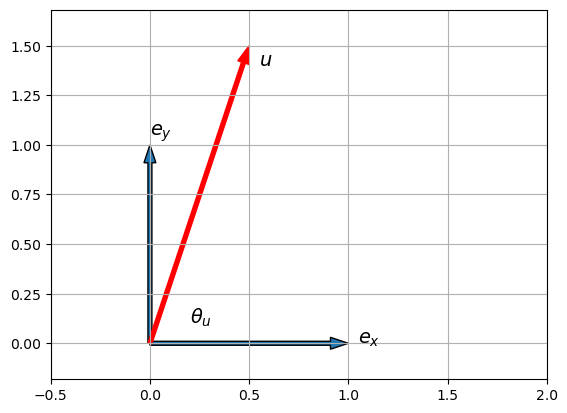

In [1]:
# Draw and label three vectors and an angle
%matplotlib inline          
import matplotlib.pyplot as plt     # the standard plot library (click on Help in the header to learn more)

plt.arrow(0,0,1,0,width=0.02,length_includes_head=True)
plt.text(1.05,0,'$e_x$',fontsize=14)
plt.text(0.2,0.1,'$\\theta_u$',fontsize=14)
plt.arrow(0,0,0,1,width=0.02,length_includes_head=True)
plt.text(0,1.05,'$e_y$',fontsize=14)
plt.arrow(0,0,0.5,1.5,width=0.02,length_includes_head=True, color='r')
plt.text(0.55,1.4,'$u$',fontsize=14)

plt.grid('on')
plt.axis('equal')
plt.axis([-.5, 2, -.5, 2]);

\begin{myfig}\label{fig:orient} The pair of blue unit-vectors, $\{e_x, e_y\}$ from (\ref{eq:exy}), specify our **orientation** in the sense that the second is **counterclockwise** from the first. Also any other vector in the plane may be written as a weighted sum of $e_x$ and $e_y$. For example, we graph the red $u$ vector of (\ref{eq:firstu}). \end{myfig}

Further examples of vector addition and scalar multiplication are

\begin{equation*}
  \begin{bmatrix} 1 \\ 3\end{bmatrix} + \begin{bmatrix} 4 \\ 1\end{bmatrix}
  = \begin{bmatrix} 5 \\ 2\end{bmatrix} \and
  6\begin{bmatrix} 4 \\ 2\end{bmatrix} = \begin{bmatrix} 24 \\ 12\end{bmatrix}.
\end{equation*}

We will also make frequent use of the **polar** representation of points in the plane. Regarding the $u$ in Figure \ref{fig:orient} we write

\begin{equation}\label{eq:upol}
  u = \begin{bmatrix} 0.5 \\ 1.5 \end{bmatrix} = \|u\|\begin{bmatrix} \cos(\theta_u) \\ \sin(\theta_u) \end{bmatrix}
\end{equation}

where $\theta_u$ is the counterclockwise angle that $u$ makes with $e_x$, and $\|u\|$ denotes the length, or **norm**, of $u$ in the pythagorean sense

\begin{equation}\label{eq:normdef}
  \|u\| \equiv \sqrt{u[0]^2 + u[1]^2} = \sqrt{10}/2
\end{equation}

where $u[0]$ and $u[1]$ are respectively the first and second elements of $u$.

The most common product of two vectors, $u$ and $v$, in the plane is the
**inner product**. It is the sum of their elementwise products

\begin{equation} \label{eq:ipdef}
  u^T v \equiv \begin{bmatrix} u[0] & u[1] \end{bmatrix}
    \begin{bmatrix} v[0] \\ v[1] \end{bmatrix} = u[0]v[0] + u[1]v[1].  
\end{equation}

As $u[j]v[j]=v[j]u[j]$ for each $j$ it follows that $u^Tv=v^Tu$. For example,

\begin{equation*}
 \begin{bmatrix}10 & 2 \end{bmatrix}
              \begin{bmatrix} -3 \\ 5\end{bmatrix}
       = 10\cdot (-3) + 2\cdot 5  = -20.
\end{equation*}

So, the inner product of two vectors is a number. The superscript $T$ on the $u$
on the far left of (\ref{eq:ipdef}) stands for **transpose** and, 
when applied to 
a column yields a **row**. Columns are vertical and rows are horizontal and so
we see, in (\ref{eq:ipdef}), that $u^T$ is $u$ laid on its side. 

As, $u^Tu=u[0]^2+u[1]^2$, we recognize that the norm of a vector is the square root of its inner product with itself, i.e.,

\begin{equation} \label{eq:normdef2}
  \|u\| = (u^Tu)^{1/2} = \left(x[0]^2+x[1]^2\right)^{1/2}. 
\end{equation}

Let's compute the inner product of the two vectors illustarted in Figure \ref{fig:mf1}.

We write them in their Cartesian and polar forms

\begin{equation*}
  u = \begin{bmatrix}u[0] \\ u[1]\end{bmatrix} =\begin{bmatrix}1 \\ 3\end{bmatrix} = \|u\|\begin{bmatrix} \cos(\theta_u) \\ \sin(\theta_u) \end{bmatrix}
  \and
  v = \begin{bmatrix}v[0] \\ v[1]\end{bmatrix} =\begin{bmatrix}4 \\ 1\end{bmatrix} = \|v\|\begin{bmatrix} \cos(\theta_v) \\ \sin(\theta_v) \end{bmatrix}
\end{equation*}

and on substitutution into (\ref{eq:ipdef}) find

\begin{equation}
  \eqalign{
  u^Tv &= u[0]v[0] + u[1]v[1] \cr
  &= \|u\|\|v\|(\cos(\theta_u)\cos(\theta_v)+ \sin(\theta_u)\sin(\theta_v)) \cr
  &= \|u\|\|v\|\cos(\theta_u-\theta_v) \cr
  &= \|u\|\|v\|\cos(\theta). \cr} \label{eq:cauchyexact}
\end{equation}

where $\theta=\theta_u-\theta_v$.
We interpret (\ref{eq:cauchyexact}) by saying that the inner product of two vectors is
proportional to the cosine of the angle between them. When this angle is $\pi/2$ we say that the two vectors
are **perpendicular** to one another.

On taking the absolute value of each side of
(\ref{eq:cauchyexact}) we arrive at the **Cauchy-Schwarz inequality**

\begin{equation}
  \boxed{|u^Tv| \le \|u\|\|v\|.} \label{eq:cauchyschwarz}
\end{equation}

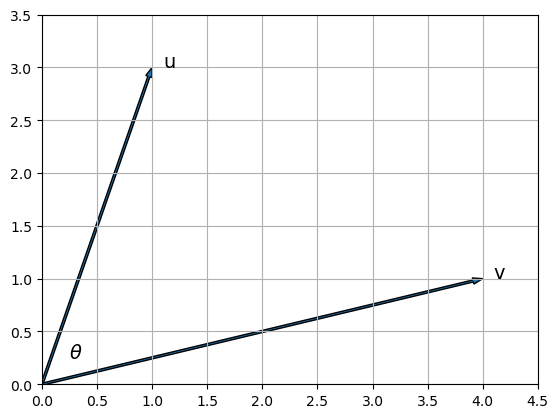

In [2]:
# Draw and label two vectors
%matplotlib inline
import matplotlib.pyplot as plt

plt.arrow(0,0,4,1,width=0.02,length_includes_head=True)
plt.text(4.1,1,'v',fontsize=14)
plt.arrow(0,0,1,3,width=0.02,length_includes_head=True)
plt.text(1.1,3,'u',fontsize=14)
plt.text(0.25,0.25,'$\\theta$',fontsize=14)
plt.grid('on')
plt.axis([0, 4.5, 0, 3.5]);

\begin{myfig}\label{fig:mf1} The angle between two vectors. \end{myfig}

\begin{exercise}\label{ex:arithmetic} Given

\begin{equation*}
  x = \begin{bmatrix} 2 \\ 1 \end{bmatrix} \and y = \begin{bmatrix} 3 \\ 4 \end{bmatrix}
\end{equation*}

complete the code cell below to compute and display **(a)** $x+y$, **(b)** $\|x\|$,
**(c)** $\|y\|$,
**(d)** $x^Ty$, and 
**(e)** the angle between $x$ and $y$. \end{exercise}

In [3]:
# vector and print operations in python
import numpy as np      # import the library of numerical functions (click Help in our header to get help with numpy)

x = np.array([2,1])    # vectors are called arrays in python
y = np.array([3,4])
print('x + y is ', x+y)
normx = np.sqrt(x[0]**2+x[1]**2)    # to take powers we use ** in python
print('norm of x is ', round(normx,3))
# normy = 
#print('norm of y is ', normy)
ip = np.dot(x, y)    # the inner product is also known as the dot product
print(' x^Ty is ', ip )
#angle =    # use np.arccos and equation 7
# print( ' angle between x and y is ', angle)

x + y is  [5 5]
norm of x is  2.236
 x^Ty is  10


\begin{exercise}\label{ex:orth2} Find a vector perpendicular to $[1,1]^T$. Use the code cell below to compute and display their inner product.
\end{exercise}

In [4]:
# Your solution here
import numpy as np

We next explore the geometry of the sum of two vectors

\begin{equation}\label{eq:uvp}
 u = \begin{bmatrix} a \\ c \end{bmatrix} \and v = \begin{bmatrix} b \\ d \end{bmatrix}
\end{equation}

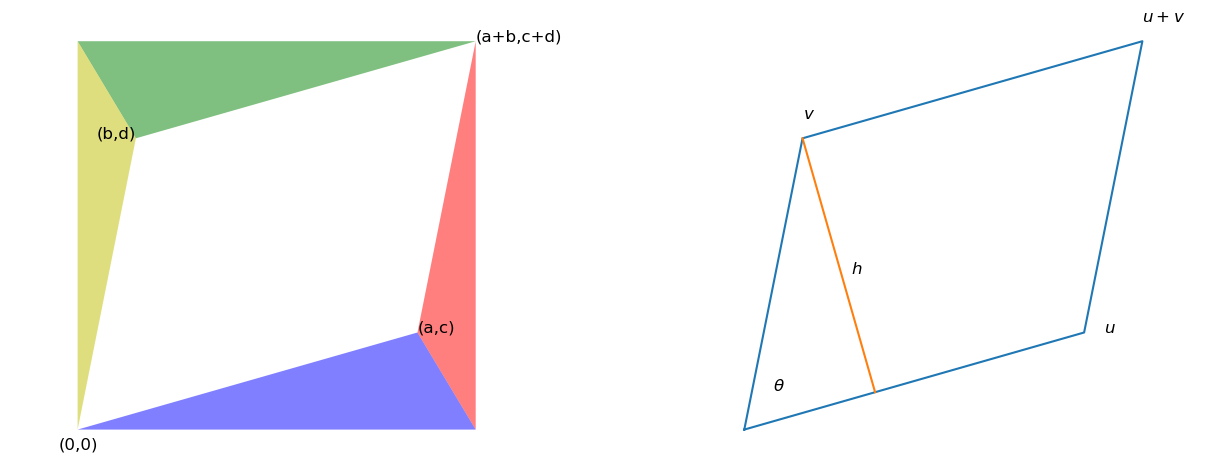

In [1]:
# vector addition as a parallelogram 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

a = 1.75
b = 0.3
c = 0.5
d = 1.5

ax1.fill([0, a+b, a, 0], [0, 0, c, 0], 'b', alpha = 0.5)
ax1.fill([a, a+b, a+b, a], [c, 0, c+d, c], 'r', alpha = 0.5)
ax1.fill([0, b, a+b, 0], [c+d, d, c+d, c+d], 'g', alpha = 0.5)
ax1.fill([0, b, 0, 0], [0, d, c+d, 0], 'y', alpha = 0.5)

ax1.text(0-.1, 0-.1, '(0,0)', fontsize=12)
ax1.text(a,c,'(a,c)', fontsize=12)
ax1.text(a+b,c+d,'(a+b,c+d)', fontsize=12)
ax1.text(b-.2,d,'(b,d)', fontsize=12)

ax1.axis('equal')
ax1.axis('off')

ax2.plot([0,a, a+b, b, 0],[0,c,c+d,d,0])
# find height
u = np.array([a,c])
v = np.array([b,d])
pv = np.dot(u,v)*u/np.dot(u,u)
ax2.plot([pv[0], v[0]], [pv[1], v[1]])
ax2.text(0.15,0.2,'$\\theta$', fontsize=12)
ax2.text(a+0.1,c,'$u$', fontsize=12)
ax2.text(b,d+0.1,'$v$', fontsize=12)
ax2.text(a+b,c+d+0.1,'$u+v$', fontsize=12)
ax2.text(0.55,0.8,'$h$', fontsize=12)

ax2.axis('equal')
ax2.axis('off');

\begin{myfig}\label{fig:mf2} The parallelogram associated with the sum the two vectors in (\ref{eq:uvp}). Each figure sets the stage for computing the area of the parallelogram. On the left we label the coordinates and see the parallelogram as the complement of 4 triangles within a rectangle. On the right we stress its angle and height.\end{myfig}

\begin{exercise}\label{ex:parallelogram} We compute the area of the parallelogram in Figure \ref{fig:mf2} by two distict means.

(a) Using the left panel, subtract the 4 triangle areas from the area of large rectangle. 

(b) Using the right panel, use area = base times height = $\Vert u\Vert\Vert v\Vert\sin(\theta)$. 

(c) Reconcile these two formulas using the fact that $\theta=\theta_v-\theta_u$. \end{exercise}

Your solution here.

\begin{exercise}\label{ex:polarization} Please complete the markdown cell below and arrive at the **polarization formula** 

\begin{equation}
  \|x+y\|^2-\|x-y\|^2 = 4x^Ty,
\end{equation}

holds for all $x$ and $y$ in $\maR^2$.
\end{exercise}

Your solution here.

\begin{equation}
  \eqalign{ \|x+y\|^2-\|x-y\|^2 &= (x+y)^T(x+y) - (x-y)^T(x-y) \\
                                &= (x^T+y^T)(x+y) - (x^T-y^T)(x-y) \\
                                &= \hbox{now FOIL both products and simplify} }
\end{equation}

\begin{exercise}\label{ex:triangineq} Show that the **triangle inequality**

\begin{equation}
  \|x+y\| \le \|x\| + \|y\| 
\end{equation}

holds for all $x$ and $y$ in $\maR^2$.
First sketch this for two concrete planar $x$ and $y$ and expound on the aptness
of the name. Then, in the markdown cell below, expand
$\|x+y\|^2$, invoke the Cauchy-Schwarz inequality, (\ref{eq:cauchyschwarz}),
and finish with a square root.
\end{exercise}

Your solution here.

As a vector is simply a column of numbers, a matrix is simply a row of columns,
or a column of rows. This necessarily requires two numbers, the row and column
indices, to specify each matrix element. For example

\begin{equation}
  A = \begin{bmatrix} A[0,0] & A[0,1] \\
                      A[1,0] & A[1,1] \end{bmatrix}
    = \begin{bmatrix} 5 & 0 \\
                      2 & 3 \end{bmatrix}  
\end{equation}

is a 2-by-2 matrix. It takes two indices to address an element, and these are always ordered $[i,j]$ where $i$ denoted the **row** and $j$ denotes the **column**.

The addition of two matrices and the multiplication of
a matrix by a scalar proceed exactly as in the vector case. In particular,

\begin{equation*}
  (A+B)[i,j] = A[i,j]+B[i,j], \hskip 0.25in \hbox{e.g.,}
  \ \begin{bmatrix} 5 & 0\\ 2 & 3\end{bmatrix} +
   \begin{bmatrix} 2 & 4\\ 1 & -3 \end{bmatrix} =
   \begin{bmatrix} 7 & 4 \\ 3 & 0 \end{bmatrix}, 
\end{equation*}

and

\begin{equation*}
  (cA)[i,j] = cA[i,j], \hskip 0.25in \hbox{e.g.,}
  \hskip 0.25in  3\begin{bmatrix} 5 & 0 \\ 2 & 3 \end{bmatrix} 
   = \begin{bmatrix} 15 & 0 \\ 6 & 9 \end{bmatrix}. 
\end{equation*}

We will often abbreviate the awkward phrase "$A$ is  $2$-by-$2$" with the
declaration $A\in\maR^{2\times 2}$. 

## Matrix-Vector Multiplication

For $A\in\maR^{2\times 2}$ and $x\in\maR^2$ we **define** $y=Ax$ as the column of inner products of each row of $A$ with $x$. In particular, denoting the $i$th row of $A$ by $A[i,:]$ we find

\begin{equation} \label{eq:matvecmult}
  y[i] = A[i,:]x = A[i,0]x[0] + A[i,1]x[1]
\end{equation}

For example

\begin{equation} \label{eq:mymultex}
  \begin{bmatrix} 2 & 3 \\ 1 & 4 \end{bmatrix}
  \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} 2\cdot 1 + 3\cdot(-1) \\ 1\cdot 1 + 4\cdot(-1) \end{bmatrix}
  = \begin{bmatrix} -1 \\ -3 \end{bmatrix}. 
\end{equation}

We see that this $A$ takes planar vectors to planar vectors. The arithmetic is simple but static. We can use python to visualize any such planar transformation. In the widget below, please first enter a 2-by-2 matrix, $A$, and then move the slider to rotate $x$ round the unit circle and observe the associated movement of $Ax$.

I recommend that you experiment, in the widget below, with

\begin{equation} \label{eq:iwasawa}
  \mathbf{dilations}:\  A(\alpha) = \begin{bmatrix} \alpha & 0 \\ 0 & 1/\alpha \end{bmatrix} \hskip 0.25in
  \mathbf{shears}:\  N(\s) = \begin{bmatrix} 1 & \s \\ 0 & 1 \end{bmatrix} \and
  \mathbf{rotations}:\  K(\theta) = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}
\end{equation}

for several values of $\alpha$, $\s$, $\theta$.

In [2]:
# Matrix vector interaction - enter matrix elements - then click on slider to rotate unit vector x
%matplotlib notebook     
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

print('Please enter the element (as a decimal number) of your matrix corresponding to the specified row and column')
A = [[float(input(str(y)+','+str(x)+' : ')) for x in range(2)] for y in range(2)]  # read the matrix elements
A = np.array(A)
Frob = np.sqrt(A[0,0]**2+A[0,1]**2+A[1,0]**2+A[1,1]**2)   # the Frobenius norm of A 
theta = 0
x = np.array([np.cos(theta), np.sin(theta)])  # the unit vector at angle theta
y = A@x
fig = plt.figure(num=' ') # num='Figure 3. Interactive Matrix-Vector Products')
s = 1.1   # scale factor for labels
xvec, = plt.plot([0,x[0]], [0,x[1]], linewidth=2) 
xlab = plt.text(s*x[0], s*x[1], 'x', fontsize=12)
yvec, = plt.plot([0,y[0]], [0,y[1]], 'r', linewidth=2)
ylab = plt.text(s*y[0], s*y[1], 'Ax', fontsize=12)

plt.axis([-Frob,Frob,-Frob,Frob])
plt.grid('on')
plt.title('A = [' + str(A[0,:]) + ',' + str(A[1,:]) + ']')

def update( theta=widgets.FloatSlider(min=0, max=6.4, step=0.01, value=0, description='$\\theta$') ):
    x = np.array([np.cos(theta), np.sin(theta)])
    y = A@x
    xvec.set_data([0,x[0]], [0,x[1]])
    xlab.set_position((s*x[0], s*x[1]))
    yvec.set_data([0,y[0]], [0,y[1]])
    ylab.set_position((s*y[0], s*y[1]))
    fig.canvas.draw_idle()

interact(update);

# If your widget does not appear type these two lines in your anaconda terminal
#    jupyter nbextension install --user --py widgetsnbextension
#    jupyter nbextension enable --user --py widgetsnbextension

0,0 : 1
0,1 : 2
1,0 : 3
1,1 : 4


\begin{myfig}\label{fig:mf3} An interactive matrix-vector multiplier-illustrator. After responding to the prompts for the four matrix elements, use the $\theta$ slider to move the blue $x$ vector along the unit circle. The widget  plots, in red, the transformed vector $Ax$.\end{myfig}

This widget hopefully justifies our uses of the words dilation, shear, and rotation. With these words in mind the construction of the associated matrices in (\ref{eq:iwasawa}) comport with their action. In particular, with $\alpha>1$,
the matrix $A(\alpha)$ stretches in the horizontal direction and compresses in the vertical direction. Similarly, with $\s>0$, the matrix $N(\s)$ stretches in the horizontal direction while leaving the vertical direction unchanged. Regarding the putative rotation matrix, $K(\theta)$, although $\cos(\theta)$ and $\sin(\theta)$ are indeed suggestive, their particular layout is not exactly obvious.


\begin{exercise}\label{ex:KFP}
Given a vector $x$ and angle $\theta$ we build a matrix $R$ that rotates $x$ counter-clockwise by $\theta$ to the vector $y$. Write

\begin{equation}\label{eq:xpyp}
x = \begin{bmatrix} r\cos(\phi) \\ r\sin(\phi) \end{bmatrix} \and
y = \begin{bmatrix} r\cos(\theta+\phi) \\ r\sin(\theta+\phi) \end{bmatrix}
\end{equation}

and then note $y=Rx$ is two equations for the four elements of $R$. As these equations are to hold for each $\phi$. Show that the two easy choices, $\phi=0$ and $\phi=\pi/2$, lead to $R=K(\theta)$.
\end{exercise}


The very responsiveness of our widget may actually defeat your ability to see what type of curve is traced by $Ax$ as $x$ traverses the unit circle. We therefore offer a static version below of the transformation of points on the unit disk by representative dilations, shears, and rotations.

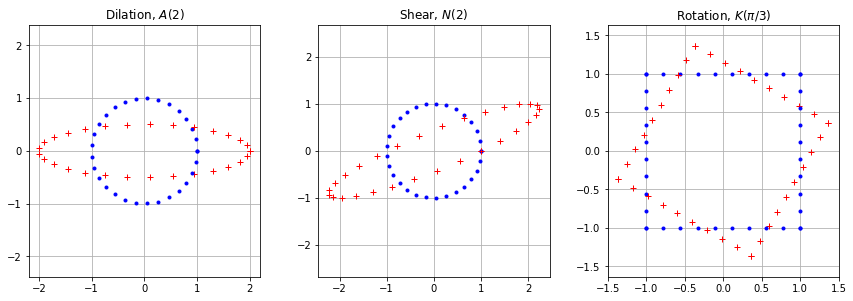

In [11]:
# Matrix Vector Multiplication
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

T = np.linspace(0,2*np.pi,30)

A = np.array([[2, 0],[0, 0.5]])
for t in T:
    x = np.array([np.cos(t), np.sin(t)])
    y = A@x
    ax1.plot(x[0],x[1],'b.')
    ax1.plot(y[0],y[1],'r+')
    
ax1.axis('equal')
ax1.grid('on')
ax1.set_title('Dilation, $A(2)$', fontsize=12)

A = np.array([[1, 2],[0, 1]])
for t in T:
    x = np.array([np.cos(t), np.sin(t)])
    y = A@x
    ax2.plot(x[0],x[1],'b.')
    ax2.plot(y[0],y[1],'r+')

ax2.axis('equal')
ax2.grid('on')
ax2.set_title('Shear, $N(2)$', fontsize=12)

T = np.linspace(-1,1,10)
theta = np.pi/3
c = np.cos(theta)
s = np.sin(theta)
A = np.array([[c,-s],[s,c]])
for t in T:
    x = np.array([1, t])
    y = A@x
    ax3.plot(x[0],x[1],'b.')
    ax3.plot(y[0],y[1],'r+')
    x = np.array([t, 1])
    y = A@x
    ax3.plot(x[0],x[1],'b.')
    ax3.plot(y[0],y[1],'r+')
    x = np.array([-1,t])
    y = A@x
    ax3.plot(x[0],x[1],'b.')
    ax3.plot(y[0],y[1],'r+')
    x = np.array([t, -1])
    y = A@x
    ax3.plot(x[0],x[1],'b.')
    ax3.plot(y[0],y[1],'r+')

ax3.axis('equal')
ax3.grid('on')
ax3.set_title('Rotation, $K(\pi/3)$', fontsize=12);

\begin{myfig}\label{fig:mf4}  An illustration of the matrix vector multiplication
conducted in (\ref{eq:iwasawa}). The first two panels show the transformation of the unit circle by a dilation of 2 and shear of 2. As the rotation of a circle is hard to see we instead, in the third panel, rotate a square by $\pi/3$.
\end{myfig}

These before and after figures give the gist of the transformation but fail to track individual points. We fix that below.

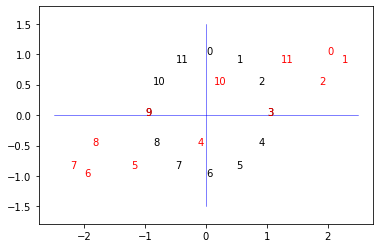

In [5]:
# Track the shear of the unit circle
import numpy as np                 # import math functions
import matplotlib.pyplot as plt    # import plot functions
%matplotlib inline                 

plt.plot([-2.5,2.5],[0,0],'b',linewidth=0.5)         # draw a blue horizontal line
plt.plot([0,0],[-1.5,1.5],'b',linewidth=0.5)         # draw a blue vertical line

N = np.array([[1, 2],              # build a shear matrix with shear value 2
              [0, 1]])

for hour in range(12):                # make hour count from 0 to 11
    ang = np.pi/2 - hour*2*np.pi/12   # make a multiple of 2*pi/12, but start at pi/2 and go clockwise
    x = np.array([[np.cos(ang)],   # make a unit column vector at that angle
                  [np.sin(ang)]])
    y = N@x                        # multiply x by N
    plt.text(x[0], x[1], hour)        # mark x with a black hour, 
    plt.text(y[0], y[1], hour, color='r')  # mark y with a red hour

plt.axis('equal');                  # fix the aspect ratio

\begin{myfig}\label{fig:mf5} Illustration of the action **shear by 2**, i.e., $N(2)x$, in red, 
for the twelve $x$ vectors, in black.
Do you see that $N(2)$ takes the black 0 to the red 0, the black 1 to the red
1 and so on? Yes, both the black 3 and black 9 remain unmoved by $N(2)$. Why?\end{myfig}

Let us take look at this code. If your code does not come with line numbers please select "View" at the top of this page and "Toggle Line Numbers."

 - Python is a small language with a large set of expansion modules. Regarding lines 2 and 3 we import two modules, **numpy** for numerical work, and **matplotlib.pyplot** for graphics, using the two standard abbreviations.
 
 - Graphical output can be directed to several place via the **%matplotlib** command. We have directed output to occur **inline,** that is within the notebook itself, via line 4.
 
 - On lines 5 and 6 we plot two lines to serve as our horizontal and vertical axes.
 
 - On lines 9 and 10 we build our shear matrix, N.
 
 - On lines 12 through 18 we step through the hours of the clock, via a **for** loop, that
 
     - constructs an angle based on the value of hour, line 13
 
     - constructs a unit vector, x, with this angle, lines 14 and 15
 
     - shears this unit vector to y=Nx, line 16 (matrix-vector multiplication via @)
 
     - plots the hour at x and the sheared hour at y, lines 17 and 18
     
 - finally we set the aspect ratio and title the graph, lines 20 and 21.

\begin{exercise}\label{ex:code1}
Copy our clock code to the cell below and edit it to track minutes rather than hours by replacing each 12 with 60. Note that the default fontsize used in lines 17 and 18 is too large. Add a final argument to each plt.text call to set the fontsize to a readable value. Explore shear values from -2.5 up to 2.5.
\end{exercise}

In [ ]:
# Your Solution Here

Our work so far has tracked the shear of the unit circle by $N(2)$. For our next code example we examine the shear of
the complementary **bow-ties**

\begin{equation}\label{eq:bowties}
  E = \{x\in\maR^2:|x_1|>|x_0|\} \and
  F = \{x\in\maR^2:|x_0|>|x_1|\}. 
\end{equation}

In the code cell below, we generate 2000 random points in $E$ and graph them, along with their sheared image, in our first subplot. In our second plot we repeat, but with random points drawn from $F$ instead.

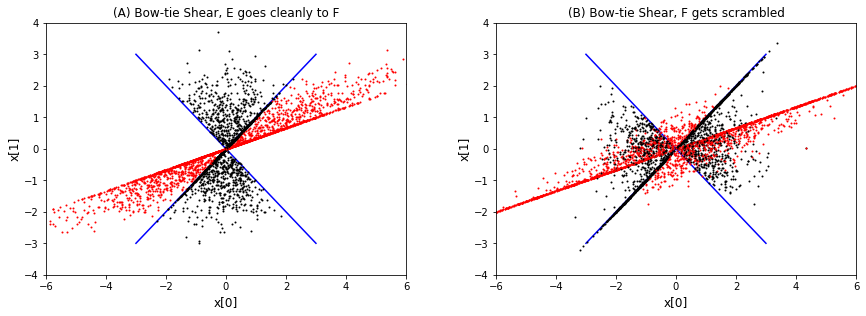

In [30]:
# Track the deformation of bowties
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 

fig, (ax1, ax2) = plt.subplots(1, 2)    # create a figure with 2 axes (plot windows)
plt.subplots_adjust(right=2, top=1, wspace=0.25)  # adjust them for the right look

N = np.array([[1, 2],              # build the shear matrix
              [0, 1]])

ax1.plot([-3,3],[3,-3],'b')         # draw a blue diagonal
ax1.plot([-3,3],[-3,3],'b')         # draw a blue anti-diagonal

ax2.plot([-3,3],[3,-3],'b')         # draw a blue diagonal
ax2.plot([-3,3],[-3,3],'b')         # draw a blue anti-diagonal

for n in range(2000):                # make n count from 0 to 1999
    x = np.random.randn(2,1)         # a 2-by-1 random (normal) vector
    if np.abs(x[0]) > np.abs(x[1]) :    # order the numbers in increasing size (E)
        x[0], x[1] = x[1], x[0]
    y = N@x                                     # y = N*x
    ax1.plot(x[0],x[1],'k.',markersize=2)       # mark x with a black dot
    ax1.plot(y[0],y[1],'r.',markersize=2)       # mark y with a red dot
    
    x = np.random.randn(2,1)         # a 2-by-1 random (normal) vector
    if np.abs(x[0]) < np.abs(x[1]) :    # order the numbers in decreasing size (F)
        x[0], x[1] = x[1], x[0]
    y = N@x                # y = N*x
    ax2.plot(x[0],x[1],'k.',markersize=2)       # mark x with a black dot
    ax2.plot(y[0],y[1],'r.',markersize=2)       # mark y with a red dot

ax1.axis([-6,6,-4,4])
ax1.set_xlabel('x[0]', fontsize=12)
ax1.set_ylabel('x[1]', fontsize=12)
ax1.set_title('(A) Bow-tie Shear, E goes cleanly to F')
ax2.axis([-6,6,-4,4])
ax2.set_xlabel('x[0]', fontsize=12)
ax2.set_ylabel('x[1]', fontsize=12)
ax2.set_title('(B) Bow-tie Shear, F gets scrambled');

\begin{myfig}\label{fig:bowtie} (A) The deformation (red) by $N(2)$ of 2000 random vectors (black) from $E$. (B) The deformation (red) by $N(2)$ of 2000 random vectors (black) from $F$. \end{myfig}

\begin{exercise}\label{ex:pingpong0}We will consider the action of

$$
  N(2) = \begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix} \and 
  N(2)^T = \begin{bmatrix} 1 & 0 \\ 2 & 1 \end{bmatrix},  \label{AandB}
$$

on the bow-ties, $E$ and $F$, of (\ref{eq:bowties}).

(a) Argue that if $x\in E$ then $y=N(2)x\in F$. That is, argue from $|x_1|>|x_0|$ and $y=N(2)x$ that $|y_1|<|y_0|$. 

(b) Argue that if $x\in F$ then $y=N(2)^Tx\in E$. 

\end{exercise}

Your solution here.

We have so far considered the transformation of single points and simple shapes. In our next example we transform each point in a complex image.

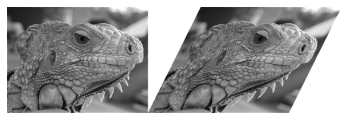

In [31]:
# Shear the Lizard
%matplotlib inline
img = plt.imread('lizard.jpg')
(m,n) = img.shape                  # img has m rows and n columns
#s = 0.5                              # shear factor
img2 = 255*np.ones((m, int(m/2) + n), dtype=np.uint8)     # create a white canvas

for i in range(m):                         # step through the rows                       
    for j in range(n):                     # step through the columns                        
        img2[i, j + int((m-1-i)/2)] = img[i, j]   # shift column information

# append img2 to img and display before and after as grayscale
plt.imshow(np.append(img, img2, axis=1), cmap='gray', vmin=0, vmax=255)
plt.axis('off');

\begin{myfig}\label{fig:lizard} An image of a lizard, normal at left and sheared at right. Can you unpack line 10 of the python cell? Do you see **how** rows are "preserved" while columns are "shifted" or "sheared"? Do you see the "shear factor" on that line? \end{myfig}

We surmise, on studying Figures \ref{fig:lizard} and \ref{fig:mf4}, that dilations, shears, and rotations preserve area. That is, when transforming shapes with one of these matrices, the new shape has the same area as the original. In order to make this precise, we return to Figure \ref{fig:mf2} and stack its two columns into the matrix.

\begin{equation}\label{eq:Mgen}
  M = \begin{bmatrix} a & b \\ c & d \end{bmatrix} 
\end{equation}

This matrix transforms the square $\{0\le x\le 1,\,0\le y\le 1\}$ to the parallelogram in Figure \ref{fig:mf2}. That is,
$M$ transforms a shape with area 1 to a shape with area $ad-bc$. As such, we name this combination of elements the **determinant** of $M$ and abbreviate it by 

\begin{equation}\label{eq:detbox}
  \boxed{\det(M) \equiv ad - bc }
\end{equation}

and note that $\det(M)$ encodes the area multiplier. We offer a concrete example of this in Figure \ref{fig:cswap}.

\begin{exercise} \label{ex:Mob0} Please confirm that $\det(A(\alpha))=\det(N(\s))=\det(K(\theta))=1$.
\end{exercise}

Your solution here.

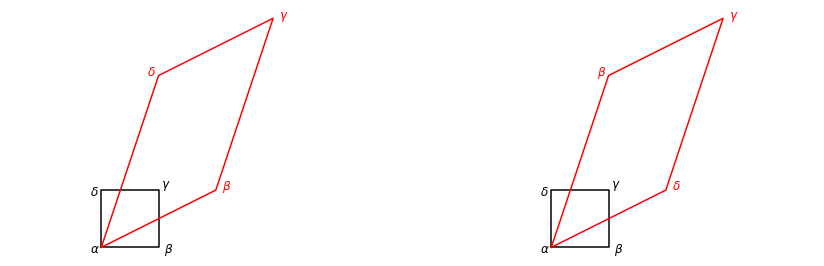

In [26]:
# impact of column swapping on orientation and area
%matplotlib inline
import numpy as np    
import matplotlib.pyplot as plt 

fig, (ax1, ax2) = plt.subplots(1, 2)    # create a figure with 2 axes (plot windows)
plt.subplots_adjust(right=2, top=1, wspace=0.25)  # adjust them for the right look

M = np.array([[2,1],[1,3]])
Mp = np.array([[1,2],[3,1]])

ax1.plot([0,1,1,0,0],[0,0,1,1,0],'k')
ax1.text(-.2, -.1, '$\\alpha$', fontsize = 12)
ax1.text(1.1, -.1, '$\\beta$', fontsize = 12)
ax1.text(1.05, 1.05, '$\gamma$', fontsize = 12)
ax1.text(-.2, 0.9, '$\delta$', fontsize = 12)
beta = np.array([[1],[0]])
Mbeta = M@beta
ax1.text(Mbeta[0]+.1, Mbeta[1], '$\\beta$', color = 'r', fontsize = 12)
gamma = np.array([[1],[1]])
Mgamma = M@gamma
ax1.text(Mgamma[0]+.1, Mgamma[1], '$\gamma$', color = 'r', fontsize = 12)
delta = np.array([[0],[1]])
Mdelta = M@delta
ax1.text(Mdelta[0]-0.2, Mdelta[1], '$\delta$', color = 'r', fontsize = 12)
ax1.plot([0, Mbeta[0], Mgamma[0], Mdelta[0], 0], [0, Mbeta[1], Mgamma[1], Mdelta[1], 0],'r')
ax1.axis('equal')
ax1.axis('off')

ax2.plot([0,1,1,0,0],[0,0,1,1,0],'k')
ax2.text(-.2, -.1, '$\\alpha$', fontsize = 12)
ax2.text(1.1, -.1, '$\\beta$', fontsize = 12)
ax2.text(1.05, 1.05, '$\gamma$', fontsize = 12)
ax2.text(-.2, 0.9, '$\delta$', fontsize = 12)
Mpbeta = Mp@beta
ax2.text(Mpbeta[0]-.2, Mpbeta[1], '$\\beta$', color = 'r', fontsize = 12)
Mpgamma = Mp@gamma
ax2.text(Mpgamma[0]+.1, Mpgamma[1], '$\gamma$', color = 'r', fontsize = 12)
Mpdelta = Mp@delta
ax2.text(Mpdelta[0]+0.1, Mpdelta[1], '$\delta$', color = 'r', fontsize = 12)
ax2.plot([0, Mpbeta[0], Mpgamma[0], Mpdelta[0], 0], [0, Mpbeta[1], Mpgamma[1], Mpdelta[1], 0],'r')
ax2.axis('equal')
ax2.axis('off');

\begin{myfig}\label{fig:cswap} The deformation of the black square, $\\{(x,y):0\le x\le 1,\ 0\le y\le 1\\}$, with boundary orientation $\\{\alpha,\beta,\gamma,\delta\\}$, by 

\begin{equation*}
 M = \begin{pmatrix} 2 & 1 \\ 1 & 3 \end{pmatrix} \hskip 0.3in \hbox{at left, and} \hskip 0.3in 
 M' = \begin{pmatrix} 1 & 2 \\ 3 & 1 \end{pmatrix} \hskip 0.3in \hbox{at right}
\end{equation*}

We observe that they each transform the square to the parallelogram of area $2\cdot 3 - 1\cdot 1 = 5$, but that $M$ retains the original orientation while $M'$ reverses it.\end{myfig}

Figure \ref{fig:cswap}, by contrasting the action of $M$ and $M'$, the matrix obtained by swapping the columns of $M$,
reveals that although they each map the unit square to the same parallelogram, that $\det(M')=-\det(M)$. As such, the true
area multiplier is $|\det(M)|$.

Figure \ref{fig:cswap} also provides a means for seeing when a determinant is, positive, negative, or zero. 
In particular, again with regard to Figure \ref{fig:cswap} we note that the second column of $M$ is counterclockwise from the first column - in agreement with the convention for orientation laid down in Figure \ref{fig:orient}, while this is reversed when we swap the order of the two columns. As a result; $\det(M)>0$ when its 2nd column is *counterclockwise* from the first, $\det(M)<0$ when its 2nd column is *clockwise* from the first. Finally, so long as its two columns are not colinear the parallelogram in Figure \ref{fig:cswap} will have a nonzero area. Let us see that this is the only way to achieve zero area or, equivalently, a zero determinant. That is, let us show that if $\det(M)=0$ then its second column is a multiple of its first.

If $\det(M)=0$ then $ad=bc$ and we recognize a two cases.

(i) $ad\ne 0$ then either is $bc$ and so we may divide $ad=bc$ by $bd$ and achieve

\begin{equation}\label{eq:det0i}
  \frac{a}{b} = \frac{c}{d}
\end{equation}

and call this common value $t$. From (\ref{eq:det0i}) we learn that $b=ta$ and $c = td$ and that when stacked this reads

\begin{equation}\label{eq:det0i2}
  \begin{bmatrix} b \\ d \end{bmatrix} = t\begin{bmatrix} a \\ c \end{bmatrix}
\end{equation}

i.e., the second column of $M$ is a multiple of its first.

\begin{exercise}\label{ex:detz}
Consider the second case. That is, show that when $ad=bc=0$ the second column of $M$ remains a multiple of its first.
\end{exercise}

Your solution here.

In addition to mapping regions, Figure \ref{fig:cswap} also shows us how the boundary of the region gets mapped. The convention for boundary orientation is that the region stays on our left as we traverse the boundary counterclockwise.
Do you see that our choice $\\{\alpha,\beta,\gamma,\delta\\}$ in Figure \ref{fig:cswap} for the unit square follows this convention?

In general, if $R$ is a planar region bounded by an oriented curve then $M$ transforms $R$ to a region with area $|\det(M)|{\rm area(R)}$ and that the new region retains the orientation of $R$ when $\det(M)>0$ and reverses the orientation of $R$ when $\det(M)<0$. As such, **when $\det(M)=1$ we note that $M$ preserves both area and orientation.**

## Matrix-Matrix Multiplication

We next ask what happens if you follow a dilation with a shear or rotation, or *vice versa.*
For example, now that we understand matrix-vector multiplication we can simply multiply the vector $N(\s)x$ by $A(\alpha)$;

\begin{equation}
  A(\alpha)N(\s)x = \begin{bmatrix} \alpha & 0 \\ 0 & 1/\alpha \end{bmatrix} 
    \begin{bmatrix} 1 & \s \\ 0 & 1 \end{bmatrix}
    \begin{bmatrix} x[0] \\ x[1] \end{bmatrix} = \begin{bmatrix} \alpha & 0 \\ 0 & 1/\alpha \end{bmatrix}
    \begin{bmatrix} x[0]+\s x[1] \\ x[1] \end{bmatrix} =
    \begin{bmatrix} \alpha (x[0]+\s x[1]) \\ x[1]/\alpha \end{bmatrix} =
    \begin{bmatrix} \alpha & \alpha\s \\ 0 & 1/\alpha \end{bmatrix}
    \begin{bmatrix} x[0] \\ x[1] \end{bmatrix}
\end{equation}

from which we deduce that

\begin{equation}\label{eq:AxN}
  A(\alpha)N(\s) = \begin{bmatrix} \alpha & \alpha\s \\ 0 & 1/\alpha \end{bmatrix}
\end{equation}

Similarily, if we reverse the order of our composition

\begin{equation}
  N(\s)A(\alpha)x = 
    \begin{bmatrix} 1 & \s \\ 0 & 1 \end{bmatrix}\begin{bmatrix} \alpha & 0 \\ 0 & 1/\alpha \end{bmatrix} 
    \begin{bmatrix} x[0] \\ x[1] \end{bmatrix} = \begin{bmatrix} 1 & \s \\ 0 & 1 \end{bmatrix}
    \begin{bmatrix} \alpha x[0] \\ x[1]/\alpha \end{bmatrix} =
    \begin{bmatrix} \alpha x[0]+\s x[1]/\alpha \\ x[1]/\alpha \end{bmatrix} =
    \begin{bmatrix} \alpha & \s/\alpha \\ 0 & 1/\alpha \end{bmatrix}
    \begin{bmatrix} x[0] \\ x[1] \end{bmatrix}
\end{equation}

from which we deduce that

\begin{equation}\label{eq:NxA}
  N(\s)A(\alpha) = \begin{bmatrix} \alpha & \s/\alpha \\ 0 & 1/\alpha \end{bmatrix}
\end{equation}

These two calculations illustrate the basic rule of **matrix-multiplication**, if $A\in\maR^{m,n}$ and $B\in\maR^{n,p}$ then their
product $C\in\maR^{m,p}$ is the collection of inner products of the rows of $A$ and columns of $B$;

\begin{equation}
  C[i,j] = A[i,:]B[:,j] = \sum_{k=0}^{n-1}A[i,k]B[k,j]
\end{equation}

\begin{exercise}\label{ex:ANKpow}
Show that for each postive integer $n$,

\begin{equation}\label{eq:ANKpow}
 A(\alpha)^n = A(\alpha^n), \hskip 0.25in 
 N(\sigma)^n = N(n\sigma), \hskip 0.25in
 K(\theta)^n = K(n\theta).
\end{equation}

These are clearly true when $n=1$. Try the $n=2$ case as a warm-up to the demonstration, required by the Principle of Mathematical Induction, that their truth at power $n$ implies their truth at power $n+1$.

\end{exercise}

Your solution here.

\begin{exercise}\label{ex:pingpong1} Use Exercises \ref{ex:pingpong0} and \ref{ex:ANKpow} to show that
if $x\in E$ then $(N(2))^nx\in F$ while
if $x\in F$ then $(N(2)^T)^nx\in E$ for all positive integer $n$.
\end{exercise}

Your solution here.

We have learned from our first example that matrix multiplication is not commutative. 
Although $A(\alpha)N(\s)\ne N(\s)A(\alpha)$ you may wish to check that

\begin{equation}\label{eq:ANe}
   A(\alpha)N(\s) = N(\alpha^2\s)A(\alpha)
\end{equation}

\begin{exercise}\label{ex:ANA}
Please confirm (\ref{eq:ANe}) and use it to show that

\begin{equation} 
  N(\alpha^2\s) = A(\alpha)N(\s)A(1/\alpha).
\end{equation}

This states that wrapping a shear in a dilation and its inverse scales the shear!

\end{exercise}

Your solution here.

Just as the transpose of a column is a row we find that the transpose of a matrix exchanges its rows and columns. More precisely, the $[i,j]$ element of $A^T$ is the $[j,i]$ element of $A$, i.e.,

\begin{equation}
  A^T[i,j] = A[j,i]
\end{equation}

We now observe that the transposes of the matrices in (\ref{eq:iwasawa}) obey

\begin{equation}
  A^T(\alpha) = \begin{bmatrix} \alpha & 0 \\ 0 & 1/\alpha \end{bmatrix} = A(\alpha), \hskip 0.25in
 N^T(\s) = \begin{bmatrix} 1 & 0 \\ \s & 1 \end{bmatrix} \and
 K^T(\theta) = \begin{bmatrix} \cos(\theta) & \sin(\theta) \\ -\sin(\theta) & \cos(\theta) \end{bmatrix} = K(-\theta) 
\end{equation}

This states that $A(\alpha)$ is **symmetric** in the sense that $A(\alpha)=A^T(\alpha)$. Where $N(\s)$ is a **horizontal shear** do you see that $N^T(\s)$ is a **vertical shear**? The fact that $K^T(\theta)=K(-\theta)$ follows from the fact that cosine is even and sine is odd.

\begin{exercise} \label{ex:ANK2} As rotation by $\theta$ followed by rotation by $-\theta$ should get you back to where you started it follows that $K(-\theta)K(\theta)$ should be an especially simple matrix. Please confirm that

\begin{equation} 
  K(-\theta)K(\theta) = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\end{equation}

We call this end result the **identity matrix** and denote it $I$. \end{exercise}

Your solution here.

\begin{exercise} \label{ex:ANK3} Please confirm that

\begin{equation} 
  N(\s)N(-\s) = I \and A(\alpha)A(1/\alpha)=I
\end{equation}

and **explain** these results in geometric terms. We naturally call $N(-\s)$ the **inverse** of $N(\s)$ and $A(1/\alpha)$ the **inverse** of $A(\alpha)$. \end{exercise}

Your solution here.

\begin{exercise} \label{ex:ANK4} Please also show that

\begin{equation} 
  N(\s)N(\tau) = N(\s+\tau) \and K(\theta)K(\phi)=K(\theta+\phi)
\end{equation}

\end{exercise}

Your solution here.

\begin{exercise} \label{ex:ANK5} Show that wrapping a shear in a rotation and its inverse rotates the shear.
More precisely, show that

\begin{equation} 
  \tilde N(\s) \equiv K(\theta)N(\s)K(-\theta)
\end{equation}

is a shear at angle $\theta$.

\end{exercise}

Your solution here.

\begin{exercise}\label{ex:reflmat} Consider the matrix

$$
  H = \begin{bmatrix} 0 & -1 \\ -1 & 0 \end{bmatrix}. \label{refl2}
$$

Experiment with this $H$ in your widget above and explain why it is called a **reflection.** Across which line does it reflect? Argue, on strictly geometric grounds, why $H^2=I$.
\end{exercise}

Your solution here.

In [ ]:
# set the context for reflection
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 

theta = np.pi/6
plt.plot([-np.cos(theta), np.cos(theta)], [-np.sin(theta), np.sin(theta)], 'k')
plt.plot([0, 1], [0, 0], 'k--')
plt.text(0.4, 0.1, '$\\theta$', fontsize=14)
plt.text(np.cos(theta)-.2, np.sin(theta)+.1, '$(\cos(\\theta), \sin(\\theta))$', fontsize=14)
plt.plot([0, np.cos(theta+np.pi/2)], [0, np.sin(theta+np.pi/2)], 'r')
plt.text(np.cos(theta+np.pi/2)-.2, np.sin(theta+np.pi/2)+.1, '$(\cos(\\theta+\pi/2), \sin(\\theta+\pi/2))$', color='r', fontsize=14)
plt.plot([0, np.cos(theta-np.pi/2)], [0, np.sin(theta-np.pi/2)], 'b')
plt.text(np.cos(theta-np.pi/2)-.2, np.sin(theta-np.pi/2)-.1, '$(\cos(\\theta-\pi/2), \sin(\\theta-\pi/2))$', color='b', fontsize=14)

plt.axis('equal')
plt.axis('off');

\begin{myfig}\label{fig:GenReflect} The (black) line through the origin that makes the angle $\theta$ with the positive $x$-axis. The matrix, $H(\theta)$, that reflects across this black line should take the black vector to itself and exchange the red and blue vectors. \end{myfig}

\begin{exercise}\label{ex:GenReflect} To build a reflection, 

\begin{equation*}
  H(\theta) = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
\end{equation*}

across the line through the origin of angle $\theta$ we note, following Figure \ref{fig:GenReflect}, that

\begin{equation*}
  \begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} \cos(\theta) \\ \sin(\theta) \end{bmatrix} = \begin{bmatrix} \cos(\theta) \\ \sin(\theta) \end{bmatrix} \and
  \begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} \cos(\theta+\pi/2) \\ \sin(\theta+\pi/2) \end{bmatrix} = \begin{bmatrix} \cos(\theta-\pi/2) \\ \sin(\theta-\pi/2) \end{bmatrix}
\end{equation*}

Show that these two conditions require that

\begin{equation}\label{eq:Htheta}
  H(\theta) = \begin{bmatrix} \cos(2\theta) & \sin(2\theta) \\ \sin(2\theta) & -\cos(2\theta) \end{bmatrix}
\end{equation}

Please confirm that $H^2(\theta)=I$ and so every reflection is its own inverse.
\end{exercise}

Your solution here.

\begin{exercise}\label{ex:RefRot} There is an intimate connection between reflections and rotations. Please show that every rotation is the product of two reflections, i.e.,

\begin{equation}\label{eq:RefRot}
  K(\theta) = H(\theta/2)H(0)
\end{equation}

More generally, please show that

\begin{equation}\label{eq:RefRotT}
  \eqalign{
    H(\theta)H(\phi) &= K(2\theta-2\phi) \cr
    K(\theta)H(\phi) &= H(\phi + \theta/2) \cr
    H(\phi)K(\theta) &= H(\phi - \theta/2) \cr}
\end{equation}

\end{exercise}

Your solution here.

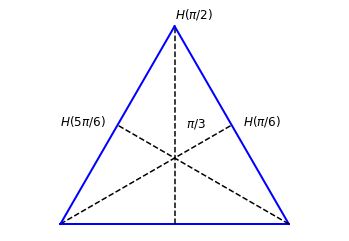

In [4]:
# equilateral triangle
%matplotlib inline
import numpy as np    
import matplotlib.pyplot as plt 

a = np.pi/3

plt.plot([0,2],[0,0],'b',linewidth=2)   # link 0
plt.plot([1,1],[0,2*np.sin(a)],'k--')
plt.text(1,1.8,'$H(\pi/2)$', fontsize=12)

plt.plot([2, 2*np.cos(a)],[0, 2*np.sin(a)],'b',linewidth=2)   # link 1
plt.plot([0,1+np.cos(a)],[0,np.sin(a)],'k--')
plt.text(1+np.cos(a)+0.1,np.sin(a),'$H(\pi/6)$', fontsize=12)
          
plt.plot([2*np.cos(a),0],[2*np.sin(a),0],'b',linewidth=2)   # link 2
plt.plot([2,1-np.cos(a)],[0,np.sin(a)],'k--')
plt.text(1-np.cos(a)-0.5,np.sin(a),'$H(5\pi/6)$', fontsize=12)
plt.text(1.1,0.85,'$\pi/3$',fontsize=12)

plt.axis('equal')
plt.axis('off');

\begin{myfig}\label{fig:eqtri} An equilateral triangle with 3 (dashed) lines of symmetry labeled by their associated reflections. \end{myfig}

\begin{exercise}\label{ex:triangle} The symmetries of the equilateral triangle, per Figure \ref{fig:eqtri}, are the six matrices

\begin{equation}\label{eq:triSym}
  I,\ K(2\pi/3),\ K(4\pi/3),\ H(\pi/6),\ H(\pi/2),\ H(5\pi/6)
\end{equation}

Use the previous exercise to complete this remarkable multiplication table

| $\Delta$ | $I$ | $K(2\pi/3)$ | $K(4\pi/3)$ | $H(\pi/6)$ | $H(\pi/2)$ | $H(5\pi/6)$ |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| $I$ | $I$ | $K(2\pi/3)$ | $K(4\pi/3)$ | $H(\pi/6)$ | $H(\pi/2)$ | $H(5\pi/6)$ |
| $K(2\pi/3)$ | $K(2\pi/3)$ | $K(4\pi/3)$ | $I$ | $H(\pi/2)$ | $H(5\pi/6)$ | $H(\pi/6)$ |
| $K(4\pi/3)$ | $K(4\pi/3)$ | $I$ | || || || ||
| $H(\pi/6)$ | $H(\pi/6)$ | $H(5\pi/6)$ | || || || ||
| $H(\pi/2)$ | $H(\pi/2)$ | $H(\pi/6)$ | || || || ||
| $H(5\pi/6)$ | $H(5\pi/6)$ | $H(\pi/2)$ | || || || ||

The entries correspond to the product of a matrix in the first column with a matrix in the first row, in that order.
For example, $K(2\pi/3)H(\pi/6)=H(\pi/2)$ while $H(\pi/6)K(2\pi/3)=H(5\pi/6)$.

\end{exercise}


\begin{exercise} \label{ex:Mob1} Let us now show that **every** matrix that preserves area and orientation can be expressed as a **unique** product of a dilation, shear and rotation. Beginning with

\begin{equation*}
   M = \begin{bmatrix} a & b \\ c & d \end{bmatrix}, \hskip 0.25in  ad-bc =1.
\end{equation*}

Let's first dispense with two special cases. Show that if $c=0$ then $ad=1$ so $a\ne 0$ and $M=N(ab)A(a)$.

Next, show that if $d=0$ then $bc=-1$ so $b\ne 0$ and $M=N(-ab)A(b)K(\pi/2)$.

We may now assume that $cd\ne 0$. Find the $\alpha>0$ and $\theta$ that allow you to achieve the bottom row of $M$ via

\begin{equation*}
   \begin{bmatrix} \alpha & 0 \\ 0 & 1/\alpha \end{bmatrix}\begin{bmatrix} * & * \\ \sin(\theta) & \cos(\theta) \end{bmatrix} 
   = \begin{bmatrix} * & * \\ c & d \end{bmatrix} 
\end{equation*}

Next find the $\s$ that allows you to achieve the top row of $M$ without disturbing its bottom row,

\begin{equation*}
   \begin{bmatrix} 1 & \s \\ 0 & 1 \end{bmatrix}
   \begin{bmatrix} \alpha & 0 \\ 0 & 1/\alpha \end{bmatrix}
   \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix} 
   = \begin{bmatrix} a & b \\ c & d \end{bmatrix} 
\end{equation*}

This last step appears to expect one parameter, $\s$, to generate both $a$ and $b$. You will reconcile this with $ad-bc=1$.
\end{exercise}

Your solution here.

\begin{exercise} \label{ex:inv2by2} Please show that if $\det(M)\ne 0$ then

\begin{equation} \label{eq:Minv}
  M^{-1} = \frac{1}{\det(M)}\begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
\end{equation}

is the **inverse** of $M$ in the sense that $MM^{-1}=M^{-1}M=I$.

\end{exercise}

Your solution here.

\begin{exercise} \label{ex:MpMinv} Use (\ref{eq:Minv}), assuming $\det(M)\ne 0$,  to achieve

\begin{equation} \label{eq:MpMinv}
  M + \det(M) M^{-1} = (a+d)I
\end{equation}

This sum, $a+d$, of the diagonal elements occurs so frequently that we give it a name. We call it the **trace** and abbreviate it by $\tr$. To wit, $\tr(M)=a+d$. Use this notion as you multiply (\ref{eq:MpMinv}) by $M$ to achieve the
quadratic equation

\begin{equation} \label{eq:Mquad}
  M^2 - \tr(M)M + \det(M) I = 0
\end{equation}

Please explore the implications of this identity when $M$ is $A(\alpha)$, $N(\s)$, $K(\theta)$, or $H(\theta)$.

\end{exercise}

Your solution here.

\begin{exercise} \label{ex:eig2by2} That polynomial in (\ref{eq:Mquad}) deserves a second look. We will see that the most powerful descriptors of a linear transformation are its eigenvalues and eigenvectors. We have seen that 2-by-2 matrices rotate and scale planar nonzero vectors. We call a nonzero $q\in\maR^2$ an **eigenvector** of $M\in\maR^{2\times 2}$ when $M$ scales, *but does not rotate*, $q$. The scale factor we call the **eigenvalue** of $M$ associated with $q$. To see these objects please enter

\begin{equation*} 
  \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}
\end{equation*}

into our widget and confirm that vectors in the $[1,1]$ direction are merely scaled by 1, while vectors in the $[1,-1]$ directions are scaled by 3.

(a) Use the widget to find the eigenvectors and eigenvalues of

\begin{equation} \label{eq:mat4114} 
  \begin{bmatrix} 4 & 1 \\ 1 & 4 \end{bmatrix}
\end{equation}

(b) With the right picture in mind let us develop an algebraic understanding of eigen-objects. To say that $q$ is an eigenvector of $M$ with eigenvalue $\la$ is to say that $Mq$ is simply $\la q$, i.e.,

\begin{equation} \label{eq:eigeq0}
  Mq = \la q
\end{equation}

This says that $M$ acts like a scalar, $\la$, for vectors on the line through $q$. As there is a common $q$ on each side of (\ref{eq:eigeq0}) it makes sense to collect terms and land at

\begin{equation} \label{eq:eigeq1}
  (M-\la I)q = 0
\end{equation}

This in turn states that $M-\la I$ sends a nonzero vector to 0. As $M-\la I$ also sends the zero vector to zero we see that $M-\la I$ cannot be invertible. It then follows from (\ref{eq:Minv}) that $\det(M-\la I)=0$. Use (\ref{eq:detbox}) to unpack this equation and conclude that $\la$ must be a solution of

\begin{equation} \label{eq:Mquad2}
  \la^2 - \tr(M)\la + \det(M) = 0
\end{equation}

the **exact same polynomial** that we discovered in the previous exercise.

(c) Confirm that the eigenvalues you computed by sight in part (a) indeed obey (\ref{eq:Mquad2}).
\end{exercise}

Your solution here.

\begin{exercise}\label{ex:TriEig} Show that if $M$ is triangular, i.e.,

\begin{equation}\label{eq:Mtri}
   M = \begin{bmatrix} a & b \\ 0 & d \end{bmatrix},
\end{equation}

then the two eigenvalues of $M$ are $a$ and $d$. Confirm that the eigenvector associated with $a$ is

\begin{equation}\label{eq:eigtri1}
   \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\end{equation}

Confirm that if $a=d$ then (\ref{eq:eigtri1}) is the only eigenvector while if $a\ne d$ then the eigenvector associated with $d$ is

\begin{equation}\label{eq:eigtri2}
   \begin{bmatrix} b/(d-a) \\ 1 \end{bmatrix}
\end{equation}

\end{exercise}


\begin{exercise}\label{ex:predet} With respect to Figure \ref{fig:square2diamond} show that

\begin{equation*}
  M = \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix} 
\end{equation*}

takes the black square to the red diamond. Use $\det(M)$ to compute the area of the red diamond and confirm that the orientation of black square is preserved.
\end{exercise}

Your solution here.

In [ ]:
# square to diamond
plt.plot([0, 1, 1, 0, 0],[0, 0, 1, 1, 0],'k',linewidth=2)
A = np.array([[2, -1],[-1, 2]])
x = np.matmul(A,np.array([[1],[0]]))
y = np.matmul(A,np.array([[0],[1]]))
z = np.array([[1],[1]])
plt.plot([0, x[0]],[0, x[1]],'r',linewidth=2)
plt.plot([0, y[0]],[0, y[1]],'r',linewidth=2)
plt.plot([y[0], z[0]],[y[1], z[1]],'r',linewidth=2)
plt.plot([x[0], z[0]],[x[1], z[1]],'r',linewidth=2)
plt.axis('equal')
plt.grid('on')

\begin{myfig}\label{fig:square2diamond} Stretching a square. \end{myfig}

As the determinant and trace are such "natural" descriptors we explore how they behave when we compose, i.e., multiply, matrices. First, as the determinant of a matrix measures the degree to which it scales areas we may guess that the change in area following a composition is the product of their individual area changes. To check this guess we set

\begin{equation}
  M = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \and N = \begin{bmatrix} s & t \\ u & v \end{bmatrix} 
\end{equation}

and compute their product

\begin{equation}
  MN = \begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} s & t \\ u & v \end{bmatrix} =
  \begin{bmatrix} as+bu & at+bv \\ cs+du & ct+dv \end{bmatrix}
\end{equation}

and note that it's determinant

\begin{equation} \label{eq:detprod}
  \det(MN) = (as+bu)(ct+dv) - (at+bv)(cs+du) = (ad-bc)(sv-tu) = \det(M)\det(N),
\end{equation}

as we had guessed. This deserves a box,

\begin{equation} \label{eq:detprodbox}
  \boxed{\det(MN) = \det(M)\det(N)}
\end{equation}


Regarding the behavior of the trace under composition 
we note although $A(\alpha)N(\s)\ne N(\s)A(\alpha)$ we do observe that
$\tr(A(\alpha)N(\s))= \tr(N(\s)A(\alpha))$. To see that this is no accident, 
we compute the *other* product

\begin{equation}
  NM = \begin{bmatrix} s & t \\ u & v \end{bmatrix}\begin{bmatrix} a & b \\ c & d \end{bmatrix} =
  \begin{bmatrix} as+ct & sb+td \\ ua+vc & bu+dv \end{bmatrix}
\end{equation}

and note that summing the diagonal terms in $MN$ and $NM$ reveals

\begin{equation} \label{eq:trprod}
  \boxed{\tr(MN) = \tr(NM)}
\end{equation}

\begin{exercise} Use (\ref{eq:detprodbox}) and (\ref{eq:trprod}) to conclude that wrapping a matrix by a second matrix and its inverse does not disturb it's determinant nor it's trace. That is, show that

\begin{equation}
   \det(NMN^{-1})=\det(M) \and \tr(NMN^{-1})=\tr(M)
\end{equation}

\end{exercise}

Your solution here.

## Kinematics

As an example of the theory developed so far we show how vector addition and matrix multiplication provide a natural language for describing the position of robot arms. To fix ideas we consider the arm, in Figure \ref{fig:2link}, with two links and two joints.

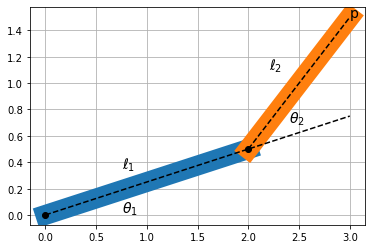

In [27]:
# 2-link robot arm
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([0,2],[0, 1/2],linewidth=20)
plt.plot(0,0,'ko')
plt.plot([2,3],[1/2,1.5],linewidth=20)
plt.plot(2,1/2,'ko')
plt.plot([0,3],[0,3/4],'k--')
plt.plot([2,3],[1/2,1.5],'k--')
plt.text(.75,.015,'$\\theta_1$', fontsize=14)
plt.text(.75,.35,'$\ell_1$', fontsize=14)
plt.text(2.4,.7,'$\\theta_2$', fontsize=14)
plt.text(2.2,1.1,'$\ell_2$', fontsize=14)
plt.text(3,3/2,'p', fontsize = 14)
plt.grid('on');

\begin{myfig}\label{fig:2link} A robot arm with two links, of lengths $\ell_1$ and $\ell_2$. The first link makes the angle $\theta_1$ with the positive x-axis. The second link makes the angle $\theta_2$ with the axis of the first link.\end{myfig}

Our modest goal is to express the position, $p$, of the end of the second link in terms of the link lengths and joint angles.

Working back from $p$ to the first joint, we specify the undeformed positions

\begin{equation*}
  p_1 = \begin{bmatrix} \ell_1 \\ 0 \end{bmatrix} \and
  p_2 = \begin{bmatrix} \ell_2 \\ 0 \end{bmatrix}.
\end{equation*}

We first rotate the second link from its **undeformed position** and translate it by the length of the first link and arrive at the intermediate position

\begin{equation*}
  q = p_1 + K(\theta_2)p_2.
\end{equation*}

We then rotate the first link and achieve the final position

\begin{equation*}
  p = K(\theta_1)q = K(\theta_1)(p_1 + K(\theta_2)p_2) = K(\theta_1)p_1 + K(\theta_1 + \theta_2)p_2
\end{equation*}

We implement this result in the widget below. Please explore!

<IPython.core.display.Javascript object>


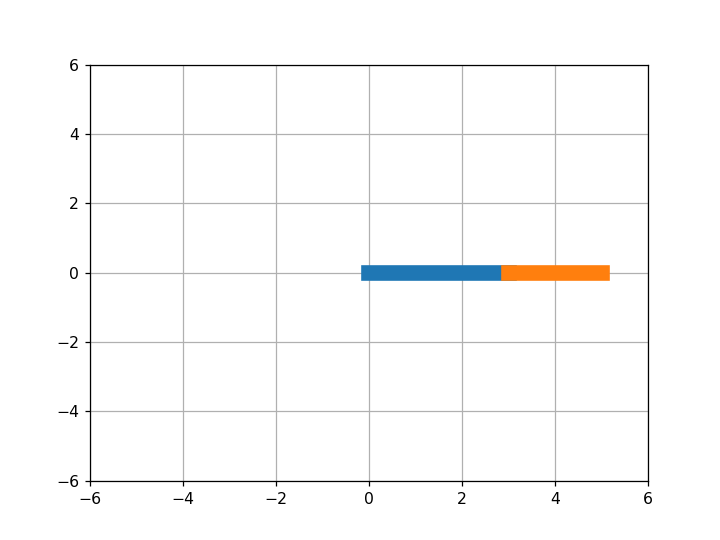

interactive(children=(FloatSlider(value=0.0, description='$\\theta_1$', max=6.4), FloatSlider(value=0.0, descr…

In [1]:
# 2-link robot arm widget
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

ell1 = 3
ell2 = 2
theta1 = 0
theta2 = 0
fig = plt.figure(' ')
link1, = plt.plot([0,ell1*np.cos(theta1)],[0, ell1*np.sin(theta1)], linewidth=10)
K1 = np.array([[np.cos(theta1), -np.sin(theta1)], [np.sin(theta1), np.cos(theta1)]])
p1 = np.array([ell1, 0])
K2 = np.array([[np.cos(theta1+theta2), -np.sin(theta1+theta2)], [np.sin(theta1+theta2), np.cos(theta1+theta2)]])
p2 = np.array([ell2, 0])
p = K1@p1 + K2@p2
link2, = plt.plot([ell1*np.cos(theta1), p[0]],[ell1*np.sin(theta1), p[1]], linewidth=10)

ellTot = ell1 + ell2 + 1
plt.axis([-ellTot,ellTot,-ellTot,ellTot])
plt.grid('on')

def update( theta1=widgets.FloatSlider(min=0, max=6.4, step=0.1, value=0, description='$\\theta_1$'), 
            theta2=widgets.FloatSlider(min=0, max=6.4, step=0.1, value=0, description='$\\theta_2$') ):
    link1.set_data([0,ell1*np.cos(theta1)],[0, ell1*np.sin(theta1)])
    K1 = np.array([[np.cos(theta1), -np.sin(theta1)], [np.sin(theta1), np.cos(theta1)]])
    K2 = np.array([[np.cos(theta1+theta2), -np.sin(theta1+theta2)], [np.sin(theta1+theta2), np.cos(theta1+theta2)]])
    p = K1@p1 + K2@p2
    link2.set_data([ell1*np.cos(theta1), p[0]],[ell1*np.sin(theta1), p[1]])
    fig.canvas.draw_idle()

interact(update);

\begin{myfig} \label{fig:robo2w} A two-armed, two-slidered robot widget.\end{myfig}

\begin{exercise}\label{ex:InvKin2}
The more common problem in robotics is to be given a target location and to produce the joint angles that get you there. With regard to Figure \ref{fig:InvKin2}, let $p_1$ denote the position of joint connecting the two links.

(a) From the physical constraints; $\|p_1\|=\ell_1$, $\|p-p_1\|=\ell_2$, and $\|p\|=\ell_3$ deduce that

\begin{equation*}
  p_1^Tp = \frac{\ell_3^2+\ell_1^2-\ell_2^2}{2}
\end{equation*}

(b) Deduce from (a) and (\ref{eq:cauchyexact}) that

\begin{equation*}
  \cos(\theta) = \frac{\ell_3^2+\ell_1^2-\ell_2^2}{2\ell_1\ell_3}
\end{equation*}

(c) Explain why (b) can be solved for $\theta$ only when $\ell_2\ge|\ell_1-\ell_3|$. What does this inequality say about the physically reachable targets?

(d) Argue that the equation in (b) also follows directly from the Law of Cosines.

(e) With $\theta$ in hand now solve for the two joint angles, $\theta_1$ and $\theta_2$, as defined in figure \ref{fig:2link}.
\end{exercise}

Your solution here.

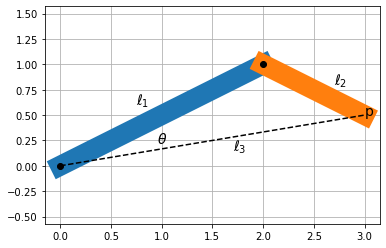

In [1]:
# 2-link robot arm Inverse Kinematics
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([0,2],[0, 1],linewidth=20)
plt.plot(0,0,'ko')
plt.plot([2,3],[1,1/2],linewidth=20)
plt.plot(2,1,'ko')
plt.text(3,1/2,'p', fontsize = 14)
plt.plot([0,3],[0,1/2],'k--')

plt.text(.95,.22,'$\\theta$', fontsize=14)
plt.text(.75,.6,'$\ell_1$', fontsize=14)
plt.text(2.7,0.8,'$\ell_2$', fontsize=14)
plt.text(1.7,0.15,'$\ell_3$', fontsize=14)
plt.axis('equal')
plt.grid('on');

\begin{myfig}\label{fig:InvKin2} Given the end position, $p$, find the angle $\theta$. \end{myfig}

\begin{exercise}\label{ex:robo3link}
Express the end position of the three-link arm in Figure \ref{fig:robo3link} in terms of its link lengths and joint angles.
\end{exercise}

Your solution here.

In [ ]:
# 3-link robot arm
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([0,2],[0, 1/2],linewidth=20)
plt.plot(0,0,'ko')
plt.plot([2,3],[1/2,1.5],linewidth=20)
plt.plot(2,1/2,'ko')
plt.plot([3,2],[1.5,2.5],linewidth=20)
plt.plot([0,3],[0,3/4],'k--')
plt.plot([2,3],[1/2,1.5],'k--')
plt.plot([2,3.5],[1/2,2],'k--')
plt.plot([3,2],[1.5,2.5],'k--')
plt.text(2,2.5,'p', fontsize=14)
plt.text(1.1,.015,'$\\theta_1$', fontsize=14)
plt.text(.75,.35,'$\ell_1$', fontsize=14)
plt.text(2.5,.75,'$\\theta_2$', fontsize=14)
plt.text(2.2,1.1,'$\ell_2$', fontsize=14)
plt.text(3,1.8,'$\\theta_3$', fontsize=14)
plt.text(2,2,'$\ell_3$', fontsize=14)
plt.plot(3,3/2,'ko')
plt.grid('on');

\begin{myfig}\label{fig:robo3link} A robot arm with three links and three joints.\end{myfig}

\begin{exercise}\label{ex:robo3w}
Please extend our two-armed, two-slidered widget to a three-armed, three-slidered widget.
\end{exercise}

In [ ]:
# Your solution here

We now move from reaching a particular target to achieving a desired motion. The classic problem is to transform linear motion (of say, a piston) to rotational motion (of say, an axle). We begin this exploration with the lovely motion in Figure \ref{fig:PL0}.

In [ ]:
# illustrate the PL lemma
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

R = 1
k = 5

fig = plt.figure(' ')

# draw the circle traced by p
ang = np.linspace(-np.pi/2, np.pi/2, 100)
plt.plot(2*R*np.cos(ang)**2, 2*R*np.cos(ang)*np.sin(ang),'b--')

# draw the line traced by q
plt.plot([k/(2*R),k/(2*R)],[-2,2], 'r--')

# construct the base case objects and view
theta = 0
p = np.array([2*R, 0])
plink, = plt.plot([0,p[0]],[0, p[1]], 'b', linewidth=4)
q = np.array([(k/(2*R)), (k/(2*R))*np.tan(theta)])
qlink, = plt.plot([0,q[0]],[0, q[1]], 'r', linewidth=2)
plt.axis('equal')
plt.grid('on')

def update( theta=widgets.FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.1, value=0, description='$\\theta$') ): 
    
    p = np.array([2*R*np.cos(theta)**2, 2*R*np.cos(theta)*np.sin(theta)])
    plink.set_data([0,p[0]],[0, p[1]])
    
    q = np.array([(k/(2*R)), (k/(2*R))*np.tan(theta)])
    qlink.set_data([0,q[0]],[0, q[1]])
     
    fig.canvas.draw_idle()

interact(update);

\begin{myfig}\label{fig:PL0} As $p$ traverses the blue circle (via the $\theta$ slider) we observe that $q$ traverses the red line.\end{myfig}

\begin{exercise}\label{ex:PL0} With reference to Figure \ref{fig:PL0}, if $p$ and $q$ are colinear and $\Vert p\Vert \Vert q\Vert =k$ then as $p$ traverses a circle through $0$ then $q$ traverses a vertical line.

(a) Show that $p(\theta)\equiv (2R\cos^2(\theta),2R\sin(\theta)\cos(\theta))$ describes a circle of radius $R$ centered at $c\equiv(R,0)$ as $\theta$ moves from $-\pi/2$ to $\pi/2$. Hint: Show that $\|p(\theta)-c\|=R$.

(b) Show that if $q(\theta)=\la p(\theta)$ and $\|p(\theta)\|\|q(\theta)\|=k$ then $\la =k/\|p\|^2$.

(c) Show that if $q(\theta)=kp(\theta)/\|p\|^2$ then $q(\theta)=(k/(2R),\ k\tan(\theta)/(2R))$ traverses a vertical line as $p(\theta)$ traverses the circle.

\end{exercise}

Your solution here.

This construction transforms circles to lines (and *vice versa*) with links that change their length with angle. To accomplish this with links of fixed length we introduce the intermediate parallelogram below.

In [ ]:
# illustrate Lemma PL1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot([0,3], [0,1], 'b', linewidth=4)
plt.plot(0,0, 'ko', markersize=12)
plt.text(0.4,-.05,'$\\theta$', fontsize=14)
plt.text(3,1.1,'r', fontsize=14)
plt.plot(3,1, 'ko', markersize=12)
plt.text(0,.1,'0',fontsize=14)

plt.plot([0,3], [0,-1], 'b', linewidth=4)
plt.text(3.1,-1.1,'t', fontsize=14)
plt.plot(3,-1, 'ko', markersize=12)

plt.plot([3,2], [1,0], 'r', linewidth=4)
plt.text(1.7,0,'p', fontsize=14)
plt.plot([2,3], [0,-1], 'r', linewidth=4)
plt.plot(2,0, 'ko', markersize=12)

plt.plot([3,4], [-1,0], 'r', linewidth=4)
plt.text(4.1,0,'q', fontsize=14)
plt.plot([4,3], [0,1], 'r',  linewidth=4)
plt.plot(4,0, 'ko', markersize=12)

plt.plot([3,3],[-1,1],'k--')
plt.plot([2,4],[0,0],'k--')
plt.text(3.1,.1,'s', fontsize=14)

plt.axis('off');

\begin{myfig}\label{fig:PL1} Six links meeting at five joints. The two blue links have equal length. The four red links have equal length. The black dashed lines will help us analyze this construction.\end{myfig}

\begin{exercise}\label{ex:PL1} We note by symmetry that $p$ and $q$ are colinear. To reconcile this with our previous construction please show that $\Vert p\Vert\Vert q\Vert =k$ for some constant $k>0$, independent of the angle $\theta$.

(a) Use the Pythagorean Theorem to deduce that $\|s\|^2+\|r-s\|^2 = \|r\|^2$ and $\|p-r\|^2 = \|r-s\|^2 + \|p-s\|^2$.

(b) Deduce from part (a) that $\|r\|^2-\|p-r\|^2=(\|s\|-\|p-s\|)(\|s\|+\|p-s\|)$.

(c) Use the figure (and symmetry guaranteed by equality of red lengths) to deduce that $\|s\|-\|p-s\|=\|p\|$ and $\|s\|+\|p-s\|=\|q\|$.

(d) Substitute your findings from part (c) into part (b) and deduce that $\|p\|\|q\|=\|r\|^2-\|p-r\|^2$ and that this is indeed independent of the angle $\theta$.

\end{exercise}

Your solution here.

On combining these two results we arrive at the beautiful Peaucellier-Lipkin linkage

<IPython.core.display.Javascript object>


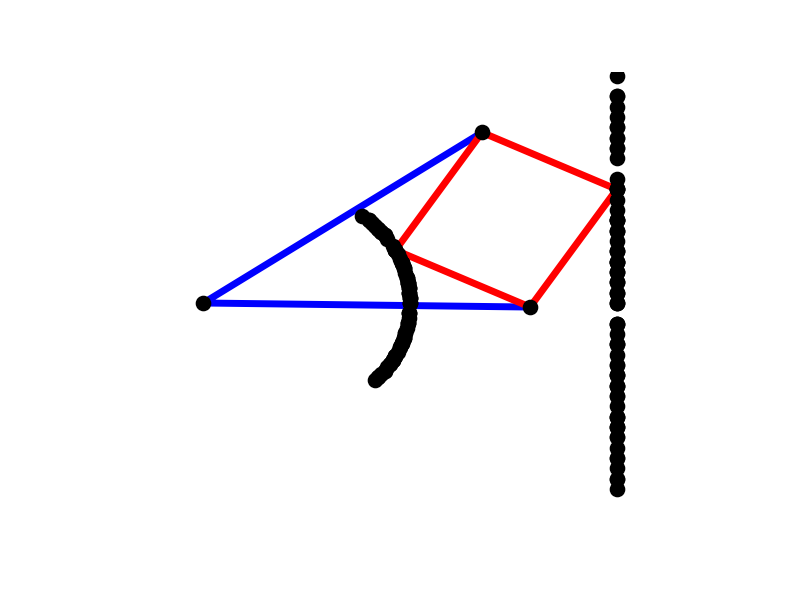

interactive(children=(FloatSlider(value=0.0, description='$q_y$', max=2.2, min=-2.2), Output()), _dom_classes=…

In [3]:
# illustrate the PL linkage
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')

qy = 0
qx = 4
blen = np.sqrt(10)
rlen = np.sqrt(2)

blink, = plt.plot([3,0,3], [1,0,-1], 'b', linewidth=4)
plt.plot(0,0, 'ko', markersize=8)

rlink, = plt.plot([3,2,3,2,3], [1,0,1,0,1], 'r', linewidth=4)

klink, = plt.plot([3,2,3,2], [1,0,1,0], 'ko', markersize=8)

plt.axis('equal')
plt.axis([-1, 5, -3, 3])
plt.axis('off')

def update( qy=widgets.FloatSlider(min=-2.2, max=2.2, step=0.1, value=0, description='$q_y$') ): 
    
    q = np.array([qx, qy])
    p = 8*q/(qx**2+qy**2)
    qang = np.arctan(qy/qx)
    alpha = np.arccos((np.linalg.norm((p+q)/2)-np.linalg.norm(p))/rlen)
    rx = p[0] + rlen*np.cos(alpha+qang)
    ry = p[1] + rlen*np.sin(alpha+qang)
    tx = p[0] + rlen*np.cos(alpha-qang)
    ty = p[1] - rlen*np.sin(alpha-qang)
    
    blink.set_data([rx, 0, tx],[ry, 0, ty])
    rlink.set_data([rx, p[0], tx, qx, rx], [ry, p[1], ty, qy, ry])
    klink.set_data([rx, p[0], tx, qx], [ry, p[1], ty, qy])
    plt.plot(p[0], p[1], 'ko', markersize = 8)
    plt.plot(q[0], q[1], 'ko', markersize = 8)
     
    fig.canvas.draw_idle()

interact(update);

\begin{myfig}\label{fig:PL} The Peaucellier-Lipkin Linkage. As you raise and lower the $q$ joint along a vertical line, the $p$ joint traces a segment of a circle. \end{myfig}

For our final planar kinematics example we explore the motion of the actual robot arm depicted in the video below.

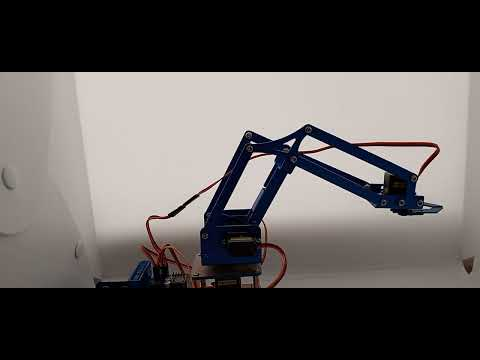

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("C6GzJ6INjdQ", width=400)
#https://youtu.be/C6GzJ6INjdQ

\begin{myfig} \label{fig:kvid} A video of the [Keyestudio Arm](https://wiki.keyestudio.com/KS0488_Keyestudio_4DOF_Robot_Arm_DIY_Kit_V2.0_for_Arduino) demonstrating two degrees of freedom. \end{myfig}

<IPython.core.display.Javascript object>


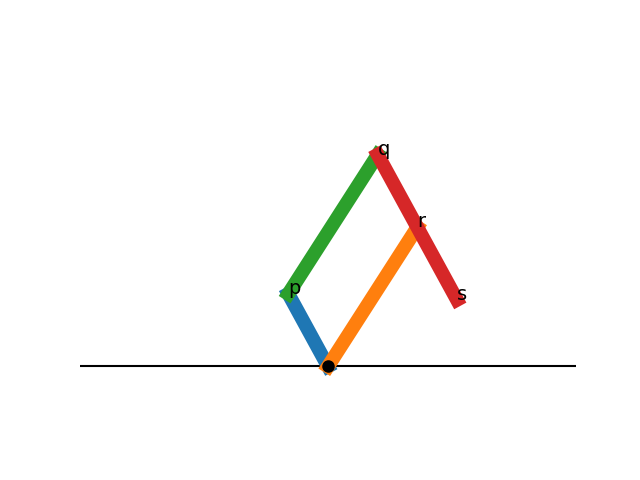

interactive(children=(FloatSlider(value=3.141592653589793, description='$\\theta_1$', max=3.141592653589793, m…

In [5]:
# illustrate the Keyes Arm
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')

plt.plot([-3,3], [0,0], 'k')

t1 = np.pi
t2 = np.pi/2
L1 = 1
L2 = 2
L3 = 1
p = L1*np.array([np.cos(t1), np.sin(t1)])

bot, = plt.plot([0, p[0]], [0, p[1]], linewidth=10)

r = L2*np.array([np.cos(t2), np.sin(t2)])
rht, = plt.plot([0, r[0]], [0, r[1]], linewidth=10)

q = r + p
lft, = plt.plot([p[0], q[0]], [p[1], q[1]], linewidth=10)

s = r + L3*np.array([np.cos(t1-np.pi), np.sin(t1-np.pi)])
top, = plt.plot([q[0], s[0]], [q[1], s[1]], linewidth=10)

zdot = plt.plot(0,0, 'ko', markersize=8)
pdot = plt.text(p[0],p[1], 'p', fontsize=14)
qdot = plt.text(q[0],q[1], 'q', fontsize=14)
rdot = plt.text(r[0],r[1], 'r', fontsize=14)
sdot = plt.text(s[0],s[1], 's', fontsize=14)

plt.axis([-3, 3, 0, 3])
plt.axis('equal')
plt.axis('off')

def update( t1=widgets.FloatSlider(min=np.pi/2, max=np.pi, step=0.1, value=np.pi, description='$\\theta_1$'), 
            t2=widgets.FloatSlider(min=0, max=np.pi, step=0.1, value=np.pi/2, description='$\\theta_2$') ):
     
    p = L1*np.array([np.cos(t1), np.sin(t1)])

    bot.set_data([0, p[0]], [0, p[1]])
    
    r = L2*np.array([np.cos(t2), np.sin(t2)])
    rht.set_data([0, r[0]], [0, r[1]])

    q = r + p
    lft.set_data([p[0], q[0]], [p[1], q[1]])
    
    s = r + L3*np.array([np.cos(t1-np.pi), np.sin(t1-np.pi)])
    top.set_data([q[0], s[0]], [q[1], s[1]])
    
    pdot.set_position((p[0], p[1]))
    qdot.set_position((q[0], q[1]))
    rdot.set_position((r[0], r[1]))
    sdot.set_position((s[0], s[1]))
    
    plt.axis([-3, 3, 0, 3])
     
    fig.canvas.draw_idle()

interact(update);

\begin{myfig}\label{fig:keyes} A robot arm with two motors at its base (thin black line). The blue link makes the angle $\theta_1$ with respect to the positive $x$-axis. The orange link makes the angle $\theta_1$ with respect to the positive $x$-axis. Joints are labeled $p$, $q$, and $r$, with end position $s$. \end{myfig}

\begin{exercise}\label{ex:keyes} With regard to Figure \ref{fig:keyes} suppose that the blue link has length $\ell_1$, the orange link has length $\ell_2$, and the red link has length $\ell_3$ and that $\Vert q-r\Vert=\ell_1$. 

(a) Express the coordinates of $p$, $q$, $r$, and $s$, in terms of these three lengths and the
two angles, $\theta_1$ and $\theta_2$.

(b) Given $s$ find the joint angles $\theta_1$ and $\theta_2$.
\end{exercise}

Your solution here.

## The Projective Line

We have been thinking of the plane as a collection of points, with each point expressed as a pair of coordinates. We have dwelt on how matrices transform points, and common shapes made of points. We now restrict our attention to the transformation of lines through the origin. We will associate each invertible $M\in\maR^{2\times 2}$ with a fractional linear transformation, $\mu$, of the projective line. Our chief goal is the visualization of the graph of $\mu$ for those
$M$ expressed as products $N(\s)A(\alpha)K(\theta)$.

To begin, we note that every **nonzero** $v\in\maR^2$ has an associated **line**;

\begin{equation*}
  \ell(v) \equiv \{av:a\in\maR\}
\end{equation*}

For example, $\ell([1,2]) = \{[a,2a]:a\in\maR\}$. Now, given an $M\in\maR^{2\times 2}$, we may associate a line with $Mv$ when $Mv\ne 0$. 

\begin{exercise}\label{ex:null0}
Show that $M$ takes a nonzero vector to zero if, and only if, $\det(M)=0$.
\end{exercise}

Your solution here.

As a result, given $0\ne v\in\maR^2$ and $M\in\maR^{2\times 2}$ with $\det(M)\ne 0$ we see that $M$ takes the line through $M$ to the line through $Mv$. That is,

\begin{equation} \label{eq:projt}
  M\ell(v) = \ell(Mv)
\end{equation}

In this sense, $M$ takes lines to lines an therefore can be said to act on the **projective line**

\begin{equation}\label{eq:PLine}
  \maP^1 = \{\ell(v): 0\ne v\in\maR^2\}
\end{equation}

In order to best work with this set we seek an alternate labeling of $\ell(v)$. To that end, with regard to Figure \ref{fig:2P1}, we note that every line through the origin, except the one through $[1,0]$, crosses the line $\{[t,1]:t\in\maR\}$ at a unique point

\begin{equation}\label{eq:PLineH}
  \maP^1 = \{[t,1]:t\in\maR\} \cup [1,0].
\end{equation}

We interpret the first piece as simply $\maR$ and the second as "the point at infinity," and so write

\begin{equation}\label{eq:PLineC}
  \boxed{\maP^1 = \maR \cup \infty}
\end{equation}

We note that our use of the definite article in "the point at infinity" was not casual. In particular, as $t$ goes to either $\pm\infty$ in Figure \ref{fig:2P1}, the associated line goes to the line through $[1,0]$. We will eventually
visualize this as curling up the real line and connecting its ends at a common point at infinity.

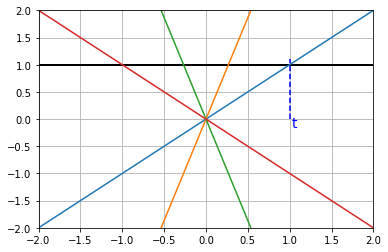

In [3]:
# The projective line 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot([-2,2],[1,1],'k', linewidth=2)
theta = np.linspace(np.pi/4,3*np.pi/4,4)
for t in theta:
    plt.plot([-5*np.cos(t), 5*np.cos(t)],[-5*np.sin(t), 5*np.sin(t)])

plt.plot([1,1],[0, 1.1],'b--')
plt.text(1.025,-.15,'t', fontsize=14, color = 'b')
plt.axis([-2,2,-2,2])
plt.grid('on')

\begin{myfig}\label{fig:2P1} An illiustration of the projective line (black) as defined by (\ref{eq:PLineH}). \end{myfig}

We now show that invertible $M$ act on $\maP^1$ via an associated fractional linear transformation.

With regard to Figure \ref{fig:2P1}, for $v=[x,y]$, if $y\ne 0$ then $\ell(v)=\ell([x,y])=\ell([x/y,1])=\ell([t,1])$ where $t=x/y$. Next, with

\begin{equation}
 M = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
\end{equation}

we note that if $\det(M)\ne 0$ then, thanks to Exercise \ref{ex:null0}, $Mv\ne 0$ and so

\begin{equation}\label{eq:ptrans}
  M(\ell(v)) = \ell(Mv) = \ell(M[x,y]) = \ell(M[t,1]) = \ell([at+b,ct+d]) 
    = \begin{cases} \ell\left(\left[\frac{at+b}{ct+d},1\right]\right) &\hbox{if}\hskip 0.2in ct+d \ne 0, \\
         \infty &\hbox{if}\hskip 0.2in ct+d = 0. \end{cases}
\end{equation}

Hence, each invertible matrix $M$ is associated with the **fractional linear transformation**

\begin{equation}\label{eq:flin}
 \boxed{\mu(t) \equiv \frac{at+b}{ct+d}}
\end{equation}

for finite $t$. To see that $\mu(t)$ is indeed well defined when $c\ne 0$ and $t=-d/c$ we note that

\begin{equation} \label{eq:flin2}
  \mu(-d/c) = \frac{b-ad/c}{0} = \infty \hskip 0.3in \hbox{because}\hskip 0.2in b\ne ad/c
\end{equation}

because $\det(M)=ad-bc\ne 0$ by assumption. In a similar fashion we may evaluate

\begin{equation} \label{eq:flin3}
  \mu(\infty) = \frac{a\infty + b}{c\infty + d} = \frac{a + b/\infty}{c + d/\infty} = \frac{a + 0}{c + 0} =a/c
\end{equation}

This last expression, $a/c$, is well defined because $\det(M)\ne 0$ implies that $a$ and $c$ can not both be zero.

As a scalar multiple of the matrix $M$ is unfelt by $\mu$ we may assume that $ad-bc = \pm 1$. We illustrate this mapping in Figure \ref{fig:mu} where $M$, following the decomposition established in Exercise \ref{ex:Mob1}, is a product of a shear, dilation, and rotation.

<IPython.core.display.Javascript object>


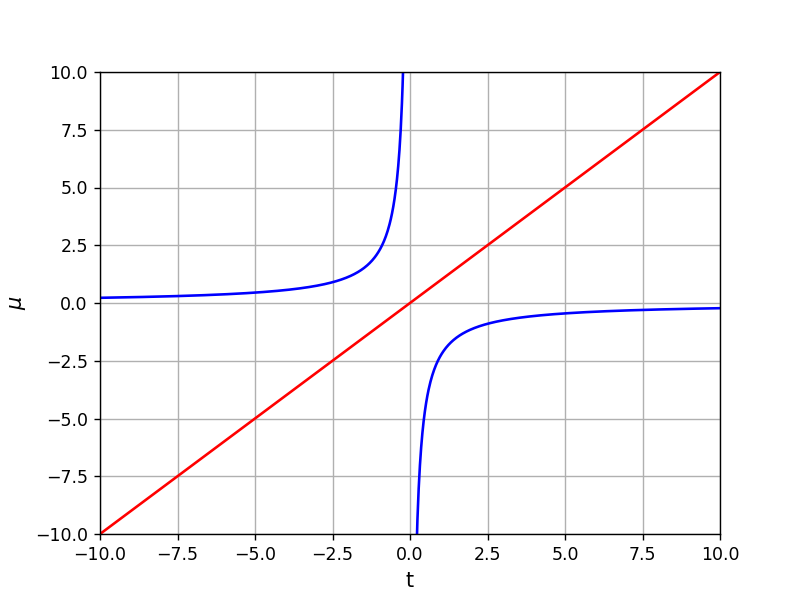

interactive(children=(FloatSlider(value=0.0, description='shear: $\\sigma$', max=10.0, min=-10.0, step=0.2), F…

In [1]:
# fractional linear transformation widget
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

t = np.linspace(-10,10,1001)
fig = plt.figure(' ')

sigma = 0
alpha = 1
theta = 0
N = np.array([[1,sigma],[0,1]])
A = np.array([[alpha,0],[0, 1/alpha]])
K = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
M = N@A@K
flin, = plt.plot(t,(M[0,0]*t+M[0,1])/(M[1,0]*t+M[1,1]), 'b') #,'.')

plt.plot(t,t,'r')
plt.xlabel('t', fontsize=12)
plt.ylabel('$\mu$', fontsize=12)
plt.axis([-10,10,-10,10])
plt.grid('on')

def update( sigma=widgets.FloatSlider(min=-10, max=10, step=0.2, value=0, description='shear: $\sigma$'), 
            alpha=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1.5, description='dilation: $\\alpha$'), 
            theta=widgets.FloatSlider(min=0, max=2*np.pi, step=np.pi/50, value=0, description='rotation: $\\theta$') ):
    
    N = np.array([[1,sigma],[0,1]])
    A = np.array([[alpha,0],[0, 1/alpha]])
    K = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    M = N@A@K
    mu = (M[0,0]*t+M[0,1])/(M[1,0]*t+M[1,1])
    ploc = np.where(np.abs(mu)>20)[0]    # pole location
    mu[ploc] = float("nan")              # ignore pole when plotting
    flin.set_data([t,mu])
    fig.canvas.draw_idle()

interact(update);

\begin{myfig}\label{fig:mu} The blue curve is the graph of $\mu(t)$ from (\ref{eq:flin}) where $M=N(\s)A(\alpha)K(\theta)$. The red diagonal serves as an aid to identifying the inverse of $\mu$ as well as the fixed points of $\mu$. \end{myfig}

\begin{exercise}\label{ex:M2mu} As $\mu$ is built from the elements of $M$ we may expect that composing two fractional linear transformations is achieved by composing their two matrices. In particular, given

\begin{equation*}
M_1 = \begin{bmatrix} a_1 & b_1 \\ c_1 & d_1 \end{bmatrix} \and
M_2 = \begin{bmatrix} a_2 & b_2 \\ c_2 & d_2 \end{bmatrix}
\end{equation*}

with associated fractional linear maps $\mu_1$ and $\mu_2$ show that $\mu_1(\mu_2(t))$ is the fractional linear transformation associated with $M_1M_2$.
\end{exercise}

Your solution here.

\begin{exercise}\label{ex:muinv} Please use the widget above to collect evidence for the conjecture that $\mu$ is an increasing function.

(a) Assuming $\det(M)=1$ show that the derivative of $\mu$ is

\begin{equation}\label{eq:muprime}
  \mu'(t)=\frac{1}{(ct+d)^2}
\end{equation}

which indeed is strictly positive and so $\mu$ is increasing.


(b) It follows from (a) that $\mu$ has an inverse function. As a special case of the previous exercise, assume $\det(M_1)=1$ and let 

\begin{equation*}
  M_2 = M_1^{-1} = \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
\end{equation*}

and show that the inverse of the $\mu_1$ function,

\begin{equation*}
  \mu_1^{-1}(t) = \frac{d_1t - b_1}{a_1-c_1t}
\end{equation*}

is the fractional linear transformation associated with $M_1^{-1}$.
\end{exercise}

Your solution here.

These recent exercises permit us to associate powers of $M$ with compositions of $\mu$. In particular, the fractional linear transformation of $M^2$ is $\mu_2(t)\equiv\mu(\mu(t))$, while that of $M^3$ is $\mu_3(t)\equiv \mu(\mu(\mu(t)))$ and so on. 

For example, if $M$ is the dilation $A(\alpha)$ with $\mu(t)=\alpha^2t$ we find $A^n(\alpha)=A(\alpha^n)$ and $\mu_n(t) = \alpha^{2n}t$ and
so, for a fixed $t=t_0$ we see that 

\begin{equation}\label{eq:dilpow}
  \mu_n(t_0) \to \begin{cases} 0 & \hbox{if}\hskip 0.2in \alpha<1, \\ \infty & \hbox{if}\hskip 0.2in \alpha>1. \end{cases}
\end{equation}

This is a special case of general phenomenon; here $0$ and $\infty$ are the two solutions of $\mu(t)=t$. For a given $\alpha$ one of these **fixed points** is **attracting** while the other is **repelling**.

\begin{exercise}\label{ex:fp1}  Show, assuming $\det(M)=1$ and $M\ne I$, that the fixed point formula, $\mu(t)=t$ is just the quadratic equation

\begin{equation}\label{eq:muq}
    ct^2 + (d-a)t  - b = 0
\end{equation}

where $t\in\maR\cup\infty$. Show that (\ref{eq:muq}) has

 (a) 2 roots when $|\tr(M)| > 2$

 (b) 1 root when $|\tr(M)| = 2$, and

 (c) 0 roots when $|\tr(M)| < 2$
 
 (d) Show that dilations satisfy criterion (a) and that their fixed points are $0$ and $\infty$, that shears satisfy criterion (b) and that the sole fixed point is at $\infty$, and that rotations satisfy criterion (c).
\end{exercise}

Your answer here.

For our next example we compose a shear and dilation and find

\begin{equation}\label{eq:mu2stab}
  M=N(2)A(3/4) = \begin{bmatrix} 3/4 & 8/3 \\ 0 & 4/3\end{bmatrix}
  \hskip 0.25in \hbox{and its associated} \hskip 0.35in \mu(t) = (9/16)t + 2
\end{equation}

As $\tr(M)>2$ we recognize from Exercise \ref{ex:fp1} that $\mu$ has two fixed points, one at infinity and the other at
$t^* = 32/7$. The code cell below generates Figure \ref{fig:mu2stab} where we see $\mu$, $t^*$, the diagonal, as well as the iterates

\begin{equation}\label{eq:muiter}
  \mu_1(t) \equiv \mu(t), \hskip 0.2in \mu_2(t) \equiv \mu(\mu_1(t)) = \mu(\mu(t)), \hskip 0.2in \mu_3(t) = \mu(\mu_2(t)) = \mu(\mu(\mu(t))), \hskip 0.2in \ldots
\end{equation}

<IPython.core.display.Javascript object>


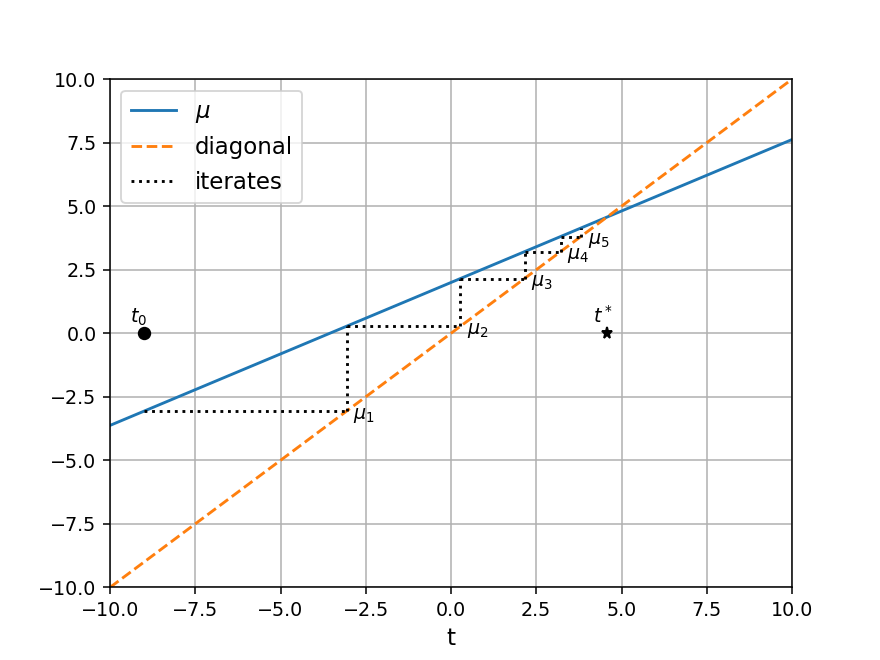

In [25]:
# Moebius Cobwebbing
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10,10,101)

sigma = 2
alpha = 3/4
theta = 0
N = np.array([[1,sigma],[0,1]])
A = np.array([[alpha,0],[0, 1/alpha]])
K = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
M = N@A@K
plt.plot(t,(M[0,0]*t+M[0,1])/(M[1,0]*t+M[1,1])) #,'.')
plt.plot(t,t,'--')

t = -9
t0 = t

for i in range(1,6):
    v = (M[0,0]*t+M[0,1])/(M[1,0]*t+M[1,1])
    plt.plot([t,v],[v,v],'k:')    # horizontal
    plt.text(v+.2, v-.3, '$\mu_'+str(i)+'$')  # label the iterates
    t = v
    plt.plot([v,v],[v,(M[0,0]*t+M[0,1])/(M[1,0]*t+M[1,1])], 'k:')  # vertical
    
plt.xlabel('t', fontsize=12)
plt.legend(['$\mu$', 'diagonal', 'iterates'], fontsize=12)

tstar = 32/7
plt.plot(tstar,0,'k*')
plt.text(tstar-.4,0.4,'$t^*$')
plt.plot(t0,0,'ko')
plt.text(t0-.4,0.4,'$t_0$')
plt.axis([-10,10,-10,10])
plt.grid('on')

\begin{myfig}\label{fig:mu2stab} Illustration of the $\mu$ from (\ref{eq:mu2stab}) and its finite fixed point, $t^*$,
and the iterates, $\mu_n$, as defined by (\ref{eq:muiter}), commencing from $t=t_0$ en route to $t^*$. \end{myfig}

As the iterates, $\mu_n$, in Figure \ref{fig:mu2stab} approach $t^*$ with increasing $n$ we deem $t^*$ **attracting**. By the same token these interates diverge from the infinite fixed point and so we deem $\infty$ and **repelling**. 

Let us examine the general product of shear and dilation.

\begin{exercise}\label{ex:muNxA} Show that 

\begin{equation}\label{eq:Napow}
  M \equiv N(\s)A(\alpha) = \begin{bmatrix} \alpha & \s/\alpha \\ 0 & 1/\alpha\end{bmatrix} \hskip 0.2in \hbox{and so}\hskip 0.2in 
  \mu(t) = \alpha^2 t + \s
\end{equation}

has the finite fixed point

\begin{equation}\label{eq:Nafp}
  t^* = \frac{\s}{1-\alpha^2}.
\end{equation}

Next show that the iterates of $\mu$, as defind in (\ref{eq:muiter}), obey

\begin{equation}\label{eq:Napow2}
  \mu_n(t) = \alpha^{2n} t + \s\sum_{j=0}^{n-1}\alpha^{2j}
\end{equation}

and so conclude that, in the limit as $n\to\infty$,

\begin{equation}\label{eq:Napow3}
  \mu_n(t)  \to \begin{cases} t^* & \hbox{if}\hskip 0.2in \alpha<1, \\ \infty & \hbox{if}\hskip 0.2in \alpha>1.\end{cases}
\end{equation}

In other words, $t^*$ is attracting when $\alpha<1$ and repelling when $\alpha>1$.
\end{exercise}

Your solution here.

Careful attention to these examples suggests that the real test for whether or not a fixed point, $t^*$, is attractive is simply whether the slope of $\mu$ is less than one there. To justify this, suppose we start our iterates at $t^*+h$ for small $h$. We use Taylor's formula to express

\begin{equation*}
  \eqalign{
  \mu_1 &= \mu(t^*+h) + \mu'(t^*)h + O(h^2) = t^* + \mu'(t^*)h + O(h^2)\\
  \mu_2 &= \mu(\mu_1) = \mu(t^* + \mu'(t^*)h + O(h^2)) = \mu(t^*) + (\mu'(t^*))^2h + O(h^2) }
\end{equation*}

Continuing in this fashion we see that $\mu_n = t^* + (\mu'(t^*))^nh + O(h^2)$ and note that this tends to $t^*$ only when
$|\mu'(t^*)|<1$. In light of (\ref{eq:muprime}) we arrive at the explicit

**Stability Criterion:** A finite fixed point $t^*$ of $\mu$ is attractive when $|ct^*+d|>1$ and repelling when $|ct^*+d|<1$.


\begin{exercise}\label{ex:fpeig} Fixed points of $\mu$ are intimately connected to eigenvalues and eigenvectors of $M$.

(a) Show that $t^*$ is a finite fixed point of $\mu$ if, and only if, $[t^*,1]$ is an eigenvector of $M$ with eigenvalue $ct^*+d$. As such, the eigenvalues of $M$ determine the stability of the finite fixed points of $\mu$.

(b) Show that if $\infty$ is a fixed point of $\mu$ then $c=0$ and $a$ is an eigenvalue of $M$ with eigenvector $[1,0]$.

(c) Confirm for the $M$ of the previous exercise that it has eigenvalue $1/\alpha$ and eigenvector $[t^*,1]$ with $t^*$ as in (\ref{eq:Nafp}), and eigenvalue $\alpha$ with eigenvector $[1,0]$.
\end{exercise}

Your solution here.

\begin{exercise}\label{ex:NxK}
When $M$ includes rotations we may use the widget above to arrive at $\mu$ with two finite fixed points. Show that the fixed points associated with $M=N(2)K(\pi/10)$ are at

\begin{equation*}
  t^*_\pm = \pm\sqrt{\frac{2\cos(\pi/10)}{\sin(\pi/10)}-1}
\end{equation*}

and determine which is attracting and which is repelling. Check your results by adapting the code that generated Figure \ref{fig:mu2stab} to this $M$.
\end{exercise}

Your solution here.

We next address the myopia in Figure \ref{fig:mu}, in that it only shows a small region of domain and range and as we move the sliders we find pieces of the curve moving into and out of our view. That figure also ignores the fact that each $\mu$ is defined at $\infty$ and that its graph wraps both horizontally and vertically. This suggests that we map our setting to the torus.

We first compress our graph, $(t,\mu(t))$, from the infinite plane to longitude and lattitude variables on the square $[-\pi,\pi]\times [-\pi,\pi]$,

\begin{equation}\label{eq:latlong}
  \theta = 2\arctan(t) \and \phi = 2\arctan(\mu(t))
\end{equation}

and then roll these onto the torus via

\begin{equation}\label{eq:torus}
  \eqalign{
    x &= (R_2 + R_1\cos(\phi))\cos(\theta) \cr
    y &= (R_2 + R_1\cos(\phi))\sin(\theta) \cr
    z &= R_1\sin(\phi) \cr}
\end{equation}

In Figure \ref{fig:Torcoord} we illustrate these toroidal coordinates, while in the following Figure \ref{fig:mumap3} we document the three-step procedure in the concrete case, $\mu(t)=-1/t$.

<IPython.core.display.Javascript object>


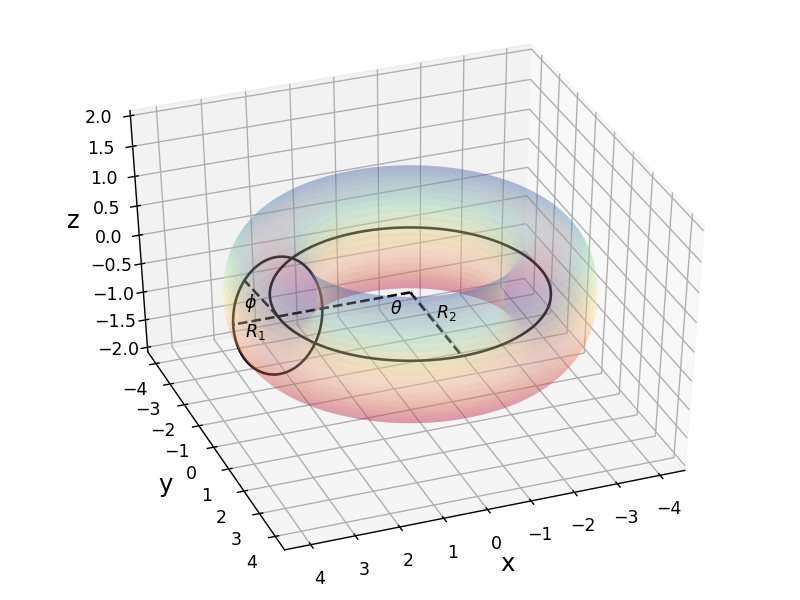

In [38]:
# torus coordinates
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work
ax.view_init(elev=40, azim=69)

# draw the torus
n = 100
theta = np.linspace(0, 2*np.pi, n)
phi = np.linspace(0, 2*np.pi, n)
Theta, Phi = np.meshgrid(theta, phi)
R1, R2 = 1, 3
x = (R2 + R1*np.cos(Theta)) * np.cos(Phi)
y = (R2 + R1*np.cos(Theta)) * np.sin(Phi)
z = R1 * np.sin(Theta)
ax.set_zlim(-2,2)
ax.plot_surface(x, y, z, alpha = 0.25, cmap='Spectral')

ax.plot3D(R2*np.cos(theta), R2*np.sin(theta), np.zeros(n), color='k')
ax.plot3D(R2 + R1*np.cos(theta), np.zeros(n), R1*np.sin(theta), color='k')
ax.plot3D([0, R2+R1], [0, 0], [0, 0], color='k', linestyle='--')
ax.plot3D([0, 0], [0, R2], [0, 0], color='k', linestyle='--')
ax.text3D(0, R2/2, 0.1, '$R_2$')
ax.plot3D([R2, R2 + R1*np.cos(np.pi/4)], [0, 0], [0, R1*np.sin(np.pi/4)], color='k', linestyle='--')
ax.text3D(R2/4, R2/4, 0, '$\\theta$')
ax.text3D(R2 + 3*R1/4, 0, R1/4, '$\phi$')
ax.text3D(R2 + 3*R1/4, 0, -R1/4, '$R_1$')

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
fig.tight_layout()

\begin{myfig}\label{fig:Torcoord} The torus is a circle of radius $R_1$, described by angle $\phi$, centered on a circle of radius $R_2$, described by angle $\theta$. The precise $(x,y,z)$ coordinates are expressed in (\ref{eq:torus}).\end{myfig}

In [3]:
# torus projection setup
# 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')

ax1 = fig.add_subplot(221)
t = np.linspace(-1000,1000,100001)
t[50000] = np.nan
mu = -1/t   # K(pi/2)
ax1.plot(t, mu, 'b', linewidth=2)
ax1.axis([-10,10,-10,10])
ax1.set_xlabel('t', fontsize=14)
ax1.set_ylabel('$\mu$', fontsize=14)
ax1.grid('on')

ax2 = fig.add_subplot(223)
u = 2*np.arctan(t)
v = 2*np.arctan(mu)
ax2.plot(u,v,'b', linewidth=2)
ax2.axis([-np.pi, np.pi,-np.pi, np.pi])
ax2.set_xlabel('$\\theta$', fontsize=14)
ax2.set_ylabel('$\phi$', fontsize=14)
ax2.grid('on')

ax3 = fig.add_subplot(122, projection='3d')

# draw the torus
n = 100
theta = np.linspace(0, 2*np.pi, n)
phi = np.linspace(0, 2*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
R1, R2 = 1, 3
x = (R2 + R1*np.cos(theta)) * np.cos(phi)
y = (R2 + R1*np.cos(theta)) * np.sin(phi)
z = R1 * np.sin(theta)
ax3.set_zlim(-3,3)
ax3.plot_surface(x, y, z, alpha = 0.25, cmap='Spectral')

# map these to torus and plot
x = (R2 + R1*np.cos(v))*np.cos(u)
y = (R2 + R1*np.cos(v))*np.sin(u)
z = R1*np.sin(v)
ax3.plot3D(x,y,z, 'b', linewidth=2)
ax3.set_xlabel('x', fontsize=14)
ax3.set_ylabel('y', fontsize=14)
ax3.set_zlabel('z', fontsize=14)

plt.subplots_adjust(right=2, top=1.5) #, wspace=0.25)   # spread things out

\begin{myfig}\label{fig:mumap3} The transformation of the graph of $\mu(t)=-1/t$, the fractional linear transformation associated with $K(\pi/2)$, rotation by $\pi/2$. At upper-left we see our close up Cartesian view. At lower-left we see the image of
this curve under the $\arctan$ compression stated in (\ref{eq:latlong}). Finally, at right, we map this compressed image on the surface of the torus, per (\ref{eq:torus}).
\end{myfig}

It remains to widgetize this process and to also plot the transformed diagonal and identify the fixed points as the crossings of our two closed curves.

<IPython.core.display.Javascript object>


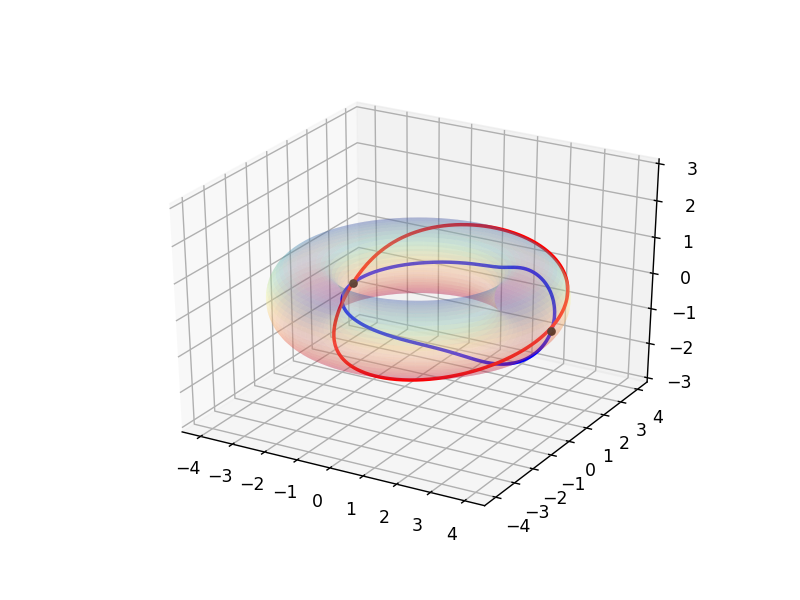

interactive(children=(FloatSlider(value=0.0, description='shear: $\\sigma$', max=10.0, min=-10.0, step=0.2), F…

In [1]:
# torus projection
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

# draw the torus
n = 100
theta = np.linspace(0, 2*np.pi, n)
phi = np.linspace(0, 2*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
R1, R2 = 1, 3
x = (R2 + R1*np.cos(theta)) * np.cos(phi)
y = (R2 + R1*np.cos(theta)) * np.sin(phi)
z = R1 * np.sin(theta)
ax.set_zlim(-3,3)
ax.plot_surface(x, y, z, alpha = 0.25, cmap='Spectral')

# construct M = NAK
sigma = 0
alpha = 2
theta = 0 #np.pi/2
N = np.array([[1,sigma],[0,1]])
A = np.array([[alpha,0],[0, 1/alpha]])
K = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
M = N@A@K

# construct planar coordinates of mu (the fractional linear transformation associated with M)
X = np.linspace(-10,10,10001)
X = X**3
Y = (M[0,0]*X+M[0,1])/(M[1,0]*X+M[1,1])

# map these to torus and plot
u = 2*np.arctan(X)
v = 2*np.arctan(Y)
x = (R2 + R1*np.cos(v))*np.cos(u)
y = (R2 + R1*np.cos(v))*np.sin(u)
z = R1*np.sin(v)
FLT, = ax.plot3D(x,y,z, color='b', linewidth=2)

# map the planar diagonal to the torus
Y = X     # the diagonal
u = 2*np.arctan(X)
v = 2*np.arctan(Y)
Dx = (R2 + R1*np.cos(v))*np.cos(u)
Dy = (R2 + R1*np.cos(v))*np.sin(u)
Dz = R1*np.sin(v)
ax.plot3D(Dx,Dy,Dz, color = 'r', linewidth=2);

# find and label crossings, where [x,y,z]=[Dx,Dy,Dz]
loc = np.where((x-Dx)**2 + (y-Dy)**2 + (z-Dz)**2 < 1e-2)[0] 
nloc = np.size(loc)
if nloc > 0:
    loclist = np.array([loc[0]])
    for ind in range(1,nloc):
        if (loc[ind] != loc[ind-1] + 1):  # ignore sequential hits
            loclist = np.append(loclist, loc[ind])
        
    nloclist = np.size(loclist)
 
    if nloclist > 1:  # now check if last is same as first (point at infinity)
        p0 = np.array([x[loclist[0]],y[loclist[0]],z[loclist[0]]])
        pend = np.array([x[loclist[-1]],y[loclist[-1]],z[loclist[-1]]])
        if (np.linalg.norm(p0-pend) < 1):
            nloclist = nloclist - 1

    FP, = ax.plot3D(x[loclist[:nloclist]],y[loclist[:nloclist]],z[loclist[:nloclist]],'k.', markersize=8)
    
    
def update( sigma=widgets.FloatSlider(min=-10, max=10, step=0.2, value=0, description='shear: $\sigma$'), 
            alpha=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=2, description='dilation: $\\alpha$'), 
            theta=widgets.FloatSlider(min=0, max=2*np.pi, step=np.pi/50, value=0, description='rotation: $\\theta$') ):
    
    N = np.array([[1,sigma],[0,1]])
    A = np.array([[alpha,0],[0, 1/alpha]])
    K = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    M = N@A@K
    
    Y = (M[0,0]*X+M[0,1])/(M[1,0]*X+M[1,1])
    u = 2*np.arctan(X)
    v = 2*np.arctan(Y)
    x = (R2 + R1*np.cos(v))*np.cos(u)
    y = (R2 + R1*np.cos(v))*np.sin(u)
    z = R1*np.sin(v)
    FLT.set_data_3d([x,y,z])
    
    # find and label crossings, where [x,y,z]=[Dx,Dy,Dz]
    loc = np.where((x-Dx)**2 + (y-Dy)**2 + (z-Dz)**2 < 1e-2)[0] 
    nloc = np.size(loc)
    if nloc > 0:
        loclist = np.array([loc[0]])
        for ind in range(1,nloc):
            if (loc[ind] != loc[ind-1] + 1):  # ignore sequential hits
                loclist = np.append(loclist, loc[ind])
        
        nloclist = np.size(loclist)
 
        if nloclist > 1:  # now check if last is same as first (point at infinity)
            p0 = np.array([x[loclist[0]],y[loclist[0]],z[loclist[0]]])
            pend = np.array([x[loclist[-1]],y[loclist[-1]],z[loclist[-1]]])
            if (np.linalg.norm(p0-pend) < 1):
                nloclist = nloclist - 1

        FP.set_data_3d(x[loclist[:nloclist]],y[loclist[:nloclist]],z[loclist[:nloclist]])
    
    else:
        FP.set_data_3d([np.nan,np.nan,np.nan])
    
    fig.canvas.draw_idle()

interact(update);

\begin{myfig}\label{fig:mutorus} The illustration of the graph of $\mu$ (blue) and the diagonal (red), with fixed points labeled by black dots. The widget begins at $A(2)$ with fixed points at $0$ and $\infty$. Add some shear and observe the motion of the finite fixed point while $\infty$ remains fixed. Explore pure rotation and observe the dissappearance of fixed points. \end{myfig}

\begin{exercise}\label{ex:TorFP} Edit the widget above to distinguish, via marker-type and/or color, attracting from repelling fixed points, by checking the size of $ct^*+d$.
\end{exercise}

In closing, we note that as $M\in\maR^{2\times 2}$ can map but 2 source points to 2 target points, as a projective transfomation it can map 3 source lines to 3 target lines.

Let us now demonstrate how to transform the three lines $\ell([t_i,1])$, where $i=1,2,3$, to the three lines $\ell([s_i,1])$ with a single matrix.
We note that $M[t_i,1]=[s_i,1]$ reads $\mu(t_i)=s_i$, i.e.,

\begin{equation*}
 \eqalign{at_1 + b &= s_1(ct_1+d) \cr
     at_2 + b &= s_2(ct_2+d) \cr
     at_3 + b &= s_3(ct_3+d)}
\end{equation*}

This is a set of three equations in the four unknown elements of $M$. We solve such systems by selective elimination of variables by taking linear combinations of the equations. To simplify the arithmetic we make the concrete choice

\begin{equation*}
  t_i = i \and s_i = i+1
\end{equation*}

and so arrive at

\begin{equation*}
 \eqalign{a + b &= 2c + 2d \cr
     2a + b &= 6c + 3d \cr
     3a + b &= 12c + 4d}
\end{equation*}

If we begin by subtracting the first from the second and third

\begin{equation*}
 \eqalign{a + b &= 2c + 2d \cr
     a &= 4c + d \cr
     2a &= 10c + 2d}
\end{equation*}

We have eliminated $b$ from the last 2 equations. If we now multiply the second by $2$ and subtract it from the third we arrive at

\begin{equation*}
 \eqalign{a + b &= 2c + 2d \cr
     a &= 4c + d \cr
     0 &= 2c}
\end{equation*}

This last equation renders $c=0$, and this in turn, on substitution into the two equations above it render $a=b=d$. Without loss we set this common value to $1$ and so find that

\begin{equation*}
 M = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}
\end{equation*}

takes the three lines, $\{\ell([1,1]),\ell([2,1]),\ell([3,1)\}$ to $\{\ell([2,1]),\ell([3,1]),\ell([4,1])\}$.

\begin{exercise}\label{ex:P1x1}
Find the projective transformation that takes $t_i=i$ to $s_i = 1/i$ for $i=1,2,3$.
\end{exercise}

Your answer here.